In [162]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json

from ggplot import *

In [2]:
df = pd.read_csv('Train.csv')
df.head(10)

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,9,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,4,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,0,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,2,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,7,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,8,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,7,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to feature_784
dtypes: float64(784), int64(1)
memory usage: 359.3 MB


In [4]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.453933,0.150047,0.273627,0.000363,0.000087,0.017835,0.084351,0.000683,0.303340,0.251321,...,0.006671,0.000038,0.278080,0.393026,0.000027,0.0,0.489655,0.004091,0.441614,0.468356
std,2.889270,0.319200,0.396285,0.014712,0.007645,0.112505,0.242649,0.022328,0.407942,0.387669,...,0.071006,0.003626,0.397938,0.432747,0.003198,0.0,0.435129,0.051939,0.438865,0.435704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.125500,0.000000,0.0,0.502000,0.000000,0.306000,0.427500
75%,7.000000,0.000000,0.608000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733400,0.502000,...,0.000000,0.000000,0.623500,0.945300,0.000000,0.0,0.988300,0.000000,0.988300,0.988300
max,9.000000,1.000000,1.000000,0.996000,0.988300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.588400,1.000000,1.000000,0.525400,0.0,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().values.any()

False

## No **NULL** values. So no need to impute the missing values

In [6]:
for col in df.columns[1:]:
    if max(df[col]) > 1:
        print(max(df[col]))

In [7]:
df['label'].unique()

array([6, 9, 4, 0, 2, 7, 8, 5, 3, 1])

## classification problem of dividing in 10 classes

In [8]:
y = df['label']
X = df.drop('label',axis=1)
X.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.9570,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9920,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,0.0000,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,0.0000,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.1686,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,0.0000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.0000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9960,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,0.4707,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,0.0000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [9]:
for col in df.columns:
    if df[col].dtype == np.int64:
        print(col)
    if df[col].dtype == str:
        print(col)

label


### sklearn imports

In [229]:
import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift
from sklearn.metrics import confusion_matrix,classification_report

In [11]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)
pca_result

array([[-0.53560397,  0.38106981,  1.8190808 ,  1.02686732],
       [-3.02723521,  1.17836151,  1.23578336, -1.95006279],
       [ 0.94908809,  3.37991332,  2.35568765,  1.10679704],
       ..., 
       [ 4.25461324, -2.40918372,  2.04999042, -1.80334862],
       [ 2.65353114, -0.74752282,  4.18904666,  0.44653369],
       [ 1.21202675,  0.73943137, -2.40911796,  0.64783451]])

In [12]:
pca.explained_variance_ratio_

array([ 0.0970466 ,  0.07095916,  0.06169076,  0.05389398])

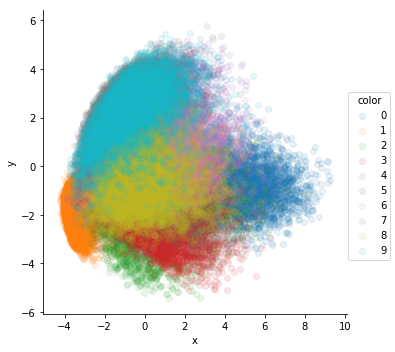

In [13]:
plot_df = pd.DataFrame(dict(x=pca_result[:,0], y=pca_result[:,1], color=y.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

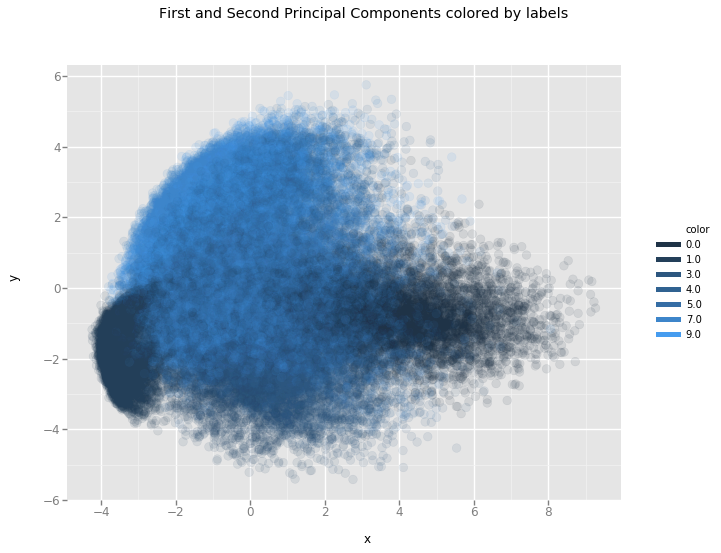

<ggplot: (-9223363256456891332)>

In [14]:
ggplot(plot_df,aes(x='x',y='y',color='color')) + geom_point(size=75,alpha=0.1) + ggtitle("First and Second Principal Components colored by labels")

In [15]:
tsne = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=500)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=500,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [16]:
tsne_results = tsne.fit_transform(X)
tsne_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 20.699s...
[t-SNE] Computed neighbors for 60000 samples in 6114.497s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities fo

array([[-13.87877464, -50.93868256],
       [  8.13512802,  27.97105217],
       [-21.02576256,  22.88847542],
       ..., 
       [-49.77339554, -12.67924023],
       [-63.74718475,  -2.52725363],
       [-75.75163269, -22.41962433]], dtype=float32)

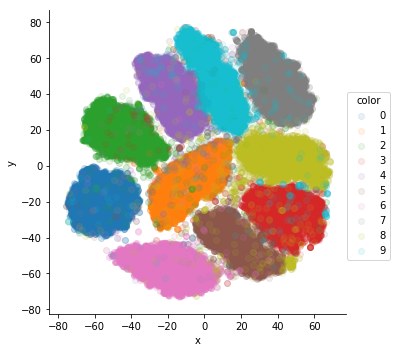

In [17]:
plot_df = pd.DataFrame(dict(x=tsne_results[:,0], y=tsne_results[:,1], color=y.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

In [18]:
tsne1 = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=600)
tsne1

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=600,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [19]:
tsne_results1 = tsne1.fit_transform(X)
tsne_results1

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 19.267s...
[t-SNE] Computed neighbors for 60000 samples in 5678.928s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities fo

array([[ 59.24030304,  -8.92716599],
       [-23.59211349, -14.93488789],
       [-25.93632698, -65.77536774],
       ..., 
       [ 40.10548401,  43.29811096],
       [ 39.39733124,  61.09376526],
       [ 60.96592331,  49.11604309]], dtype=float32)

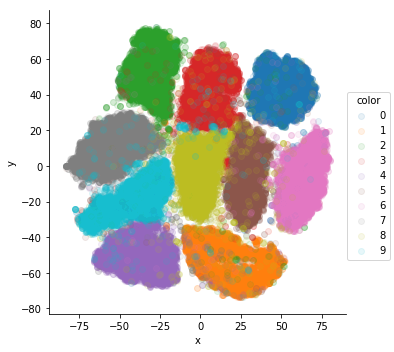

In [20]:
plot_df = pd.DataFrame(dict(x=tsne_results1[:,0], y=tsne_results1[:,1], color=y.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

In [21]:
tsne2 = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=700)
tsne2

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=700,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [22]:
tsne_results2 = tsne2.fit_transform(X)
tsne_results2

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 19.227s...
[t-SNE] Computed neighbors for 60000 samples in 5668.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities fo

array([[ 46.05770874, -53.53105545],
       [ 11.75862503,  37.76969147],
       [ 29.04925919,  67.53118896],
       ..., 
       [-54.59361649, -36.32068634],
       [-72.16177368, -34.45223999],
       [-61.74850082, -59.44873428]], dtype=float32)

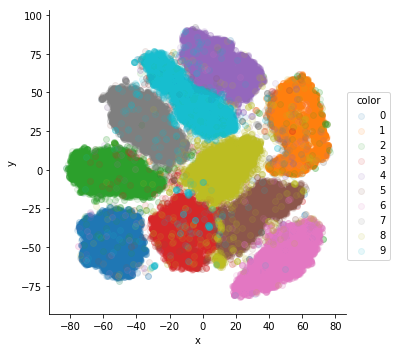

In [23]:
plot_df = pd.DataFrame(dict(x=tsne_results2[:,0], y=tsne_results2[:,1], color=y.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

### 50 features represent nearly 82.5% data 

In [367]:
pca_100 = PCA(n_components=100)
pca_100_results = pca_100.fit_transform(X)
pca_100_results

array([[-0.53560446,  0.38107894,  1.81909121, ..., -0.03732754,
        -0.01384999,  0.02556814],
       [-3.0272349 ,  1.17837153,  1.23578846, ..., -0.05149372,
        -0.14103675, -0.12633675],
       [ 0.94908606,  3.37991716,  2.35565404, ..., -0.0636554 ,
        -0.08635685, -0.29917789],
       ..., 
       [ 4.25461447, -2.40919968,  2.05003409, ..., -0.12663417,
         0.05293782, -0.04170979],
       [ 2.65353067, -0.74751972,  4.18898125, ..., -0.2641038 ,
        -0.13003987,  0.21416092],
       [ 1.21202365,  0.73946144, -2.40913171, ...,  0.28203143,
        -0.40675214, -0.00563876]])

In [368]:
np.sum(pca_100.explained_variance_ratio_)

0.91424853976709375

In [24]:
pca_50 = PCA(n_components=50)
pca_50_results = pca_50.fit_transform(X)
pca_50_results

array([[-0.53560446,  0.38107894,  1.81909121, ...,  0.4038729 ,
         0.30407597, -0.11220829],
       [-3.0272349 ,  1.17837153,  1.23578846, ..., -0.56030121,
         0.66553473, -0.34026691],
       [ 0.94908605,  3.37991716,  2.35565404, ...,  0.02910798,
        -0.06239535,  0.15711298],
       ..., 
       [ 4.25461447, -2.40919968,  2.05003409, ..., -0.04073594,
         0.35152878,  0.02636639],
       [ 2.65353067, -0.74751972,  4.18898124, ..., -0.04236302,
        -0.44242983,  0.3724816 ],
       [ 1.21202365,  0.73946144, -2.4091317 , ...,  0.18712865,
         0.38715592,  0.41801676]])

In [25]:
np.sum(pca_50.explained_variance_ratio_)

0.82461608455698643

In [30]:
tsne_pca = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=600)
# tsne3 = TSNE(n_components=2,verbose=1,perplexity=40,n_iter=1000,learning_rate=500)
tsne_pca

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=600,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [31]:
tsne_pca_results = tsne_pca.fit_transform(pca_50_results)
tsne_pca_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.268s...
[t-SNE] Computed neighbors for 60000 samples in 465.900s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

array([[ 42.80109024, -32.03370667],
       [ 33.2226944 ,  46.3501358 ],
       [ 75.32246399,  31.11903   ],
       ..., 
       [ -7.87578106, -59.7380867 ],
       [-14.20882607, -75.30664825],
       [ 14.61075306, -82.95470428]], dtype=float32)

In [395]:
X_train_whole = tsne_pca_results[:60000]
X_test_whole = tsne_pca_results[60000:]

In [396]:
X_train_whole.shape,X_test_whole.shape

((60000, 2), (10000, 2))

In [394]:
tsne_pca_results

array([[ 17.61765289,  56.17063522],
       [-24.12239838, -45.81641769],
       [-66.30419159, -42.4208374 ],
       ..., 
       [-64.36174774,  -8.78186417],
       [  5.37185621,  65.60328674],
       [  1.51155794, -48.5108757 ]], dtype=float32)

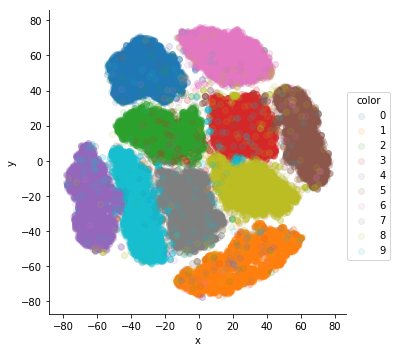

In [397]:
plot_50_df = pd.DataFrame(dict(x=X_train_whole[:,0], y=X_train_whole[:,1], color=y.values))

sns.lmplot('x', 'y', data=plot_50_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

#### TRAIN_TEST_SPLIT

In [261]:
X_str_train,X_str_test,y_str_train,y_str_test = train_test_split(tsne_pca_results,y.values,test_size=int(len(X)/6),random_state=42)

In [262]:
X_str_train.shape,X_str_test.shape

((50000, 2), (10000, 2))

In [263]:
y_str_train.shape,y_str_test.shape

((50000,), (10000,))

In [398]:
X_train,X_test,y_train,y_test = train_test_split(X_train_whole,y,test_size=int(len(X)/6),random_state=42)

In [399]:
X_test.shape,y_test.shape

((10000, 2), (10000,))

In [400]:
X_train.shape,y_train.shape

((50000, 2), (50000,))

In [401]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=int(len(X_train)/5),random_state=21)

In [402]:
X_train.shape,X_val.shape

((40000, 2), (10000, 2))

### SCALING THE DATA IS PREFERRED

In [403]:
X_train

array([[ 10.28274059,  17.98054504],
       [-76.16069794, -16.33704948],
       [ 55.57629395,   0.48957208],
       ..., 
       [  4.91490602, -40.72790909],
       [-28.10427856,  11.857584  ],
       [ 34.42190552, -43.65626526]], dtype=float32)

In [404]:
np.abs(X_train)

array([[ 10.28274059,  17.98054504],
       [ 76.16069794,  16.33704948],
       [ 55.57629395,   0.48957208],
       ..., 
       [  4.91490602,  40.72790909],
       [ 28.10427856,  11.857584  ],
       [ 34.42190552,  43.65626526]], dtype=float32)

In [405]:
X_train_scaled = X_train/np.max(np.abs(X_train),axis=0)
X_train_scaled

array([[ 0.13098213,  0.23116513],
       [-0.97013927, -0.21003568],
       [ 0.70793396,  0.00629414],
       ..., 
       [ 0.06260635, -0.52361441],
       [-0.35799387,  0.15244587],
       [ 0.43846816, -0.56126249]], dtype=float32)

In [406]:
X_val_scaled = X_val/np.max(np.abs(X_val),axis=0)
X_val_scaled

array([[-0.06328592, -0.91074425],
       [-0.34113926,  0.69346303],
       [ 0.25951591,  0.12439685],
       ..., 
       [ 0.09807844,  0.85633504],
       [-0.45604113, -0.34059262],
       [-0.61748821, -0.39094752]], dtype=float32)

In [407]:
X_test_scaled = X_test/np.max(np.abs(X_test),axis=0)
X_test_scaled

array([[-0.20868261,  0.01637924],
       [ 0.48044047,  0.1761065 ],
       [ 0.5314061 ,  0.50086719],
       ..., 
       [ 0.58157516, -0.55275756],
       [ 0.42385024,  0.37332413],
       [-0.45949218,  0.87119091]], dtype=float32)

In [ ]:
X_test_scaled = X_test/np.max(np.abs(X_test),axis=0)
X_test_scaled

In [194]:
np.save('X_train.scaled.npy',X_train_scaled)
np.save('X_val_scaled.npy',X_val_scaled)
np.save('X_test_scaled.npy',X_test_scaled)
np.save('y_train.npy',y_train.values)
np.save('y_val.npy',y_val.values)
np.save('y_test.npy',y_test.values)

## Consider two models DT and NN

### NN

In [408]:
import keras
from keras.models import Sequential,model_from_json,load_model
from keras.layers import Dense,Add,Dropout
from keras import optimizers,losses
from keras.callbacks import History,ModelCheckpoint,TensorBoard
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [409]:
checkpoint = ModelCheckpoint('./model_pca_50_tsne_whole.h5',
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

In [410]:
def my_generator(x_data,y_data,batch_size):
    L = len(x_data)
    while True:
        batch_start = 0
        batch_end = batch_size
        while batch_start < L:
            end = min(batch_end,L)
            x_batch = x_data[batch_start:end]
            y_batch = y_data[batch_start:end]
            yield (x_batch,y_batch)
            batch_start += batch_size
            batch_end += batch_size

In [411]:
def my_predict_generator(x_data,batch_size):
    L = len(x_data)
    while True:
        batch_start = 0
        batch_end = batch_size
        while batch_start < L:
            end = min(batch_end,L)
            x_batch = x_data[batch_start:end]
            yield x_batch
            batch_start += batch_size
            batch_end += batch_size

In [412]:
def print_best_model_results(model_hist):
    best_epoch = np.argmax(model_hist['val_acc'])
    print('epoch:', best_epoch+1,', val_acc:', model_hist['val_acc'][best_epoch],', val_loss:',model_hist['val_loss'][best_epoch])

In [413]:
def plot_metrics(hist, stop=50):  # stop -> no of data pts in plot\n",
    fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.plot(range(stop), hist['acc'], label='Training', color='#FF533D'),
    ax0.plot(range(stop), hist['val_acc'], label='Validation', color='#03507E'),
    ax0.set_title('Accuracy'),
    ax0.set_ylabel('Accuracy'),
    ax0.set_xlabel('Epoch'),
    ax0.legend(loc='lower right'),

    ax1.plot(range(stop), hist['loss'], label='Training', color='#FF533D'),
    ax1.plot(range(stop), hist['val_loss'],label='Validation', color='#03507E'),
    ax1.set_title('Loss'),
    ax1.set_ylabel('Loss'),
    ax1.set_xlabel('Epoch'),
    ax1.legend(loc='upper right'),
 
    plt.tight_layout(),
   
    print("Best Model: "),
    print_best_model_results(hist)

In [414]:
model = Sequential()
model.add(Dense(units=512,input_shape=(2,),activation='relu',use_bias=True))
# model.add(Dropout(0.1))
model.add(Dense(units=512,activation='relu',use_bias=True))
# model.add(Dropout(0.1))
model.add(Dense(units=512,activation='relu',use_bias=True))
model.add(Dense(units=10,activation='softmax',use_bias=True))

In [415]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 512)               1536      
_________________________________________________________________
dense_158 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_159 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_160 (Dense)            (None, 10)                5130      
Total params: 531,978
Trainable params: 531,978
Non-trainable params: 0
_________________________________________________________________


In [416]:
model.compile(optimizer = optimizers.SGD(lr=0.02,momentum=0.9),loss = losses.categorical_crossentropy,metrics=['accuracy'])

In [417]:
fit = model.fit_generator(my_generator(X_train_scaled,to_categorical(y_train.values),32),
                          steps_per_epoch=len(X_train_scaled)/32,
                          epochs=100,
                          validation_data=my_generator(X_val_scaled,to_categorical(y_val.values),16),
                          validation_steps=len(X_val_scaled)/16,
                          callbacks=[checkpoint,tensorboard]
                         )

Epoch 1/100
1250/1250 [==============================] - 16s 13ms/step - loss: 0.4312 - acc: 0.9025 - val_loss: 0.2500 - val_acc: 0.9594
Epoch 2/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.2415 - acc: 0.9547 - val_loss: 0.1994 - val_acc: 0.9682
Epoch 3/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.2064 - acc: 0.9597 - val_loss: 0.1859 - val_acc: 0.9685
Epoch 4/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1943 - acc: 0.9615 - val_loss: 0.1830 - val_acc: 0.9675
Epoch 5/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1868 - acc: 0.9636 - val_loss: 0.1798 - val_acc: 0.9675
Epoch 6/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1814 - acc: 0.9642 - val_loss: 0.1773 - val_acc: 0.9660
Epoch 7/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.1779 - acc: 0.9646 - val_loss: 0.1781 - val_acc: 0.9654
Epoch 8/100
1250/1250 [===================

1250/1250 [==============================] - 13s 10ms/step - loss: 0.1532 - acc: 0.9688 - val_loss: 0.1520 - val_acc: 0.9722
Epoch 30/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1527 - acc: 0.9688 - val_loss: 0.1518 - val_acc: 0.9724
Epoch 31/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1521 - acc: 0.9690 - val_loss: 0.1516 - val_acc: 0.9722
Epoch 32/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1517 - acc: 0.9692 - val_loss: 0.1514 - val_acc: 0.9722
Epoch 33/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1512 - acc: 0.9692 - val_loss: 0.1512 - val_acc: 0.9720
Epoch 34/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1507 - acc: 0.9694 - val_loss: 0.1512 - val_acc: 0.9723
Epoch 35/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1503 - acc: 0.9693 - val_loss: 0.1511 - val_acc: 0.9724
Epoch 36/100
1250/1250 [=======================

1250/1250 [==============================] - 14s 11ms/step - loss: 0.1434 - acc: 0.9706 - val_loss: 0.1483 - val_acc: 0.9731
Epoch 60/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1431 - acc: 0.9705 - val_loss: 0.1485 - val_acc: 0.9733
Epoch 61/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.1430 - acc: 0.9704 - val_loss: 0.1478 - val_acc: 0.9733
Epoch 62/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1429 - acc: 0.9703 - val_loss: 0.1479 - val_acc: 0.9735
Epoch 63/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1427 - acc: 0.9705 - val_loss: 0.1481 - val_acc: 0.9740
Epoch 64/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1425 - acc: 0.9704 - val_loss: 0.1477 - val_acc: 0.9739
Epoch 65/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1422 - acc: 0.9706 - val_loss: 0.1478 - val_acc: 0.9738
Epoch 66/100
1250/1250 [========================

Epoch 91/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1379 - acc: 0.9714 - val_loss: 0.1480 - val_acc: 0.9739
Epoch 92/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1377 - acc: 0.9714 - val_loss: 0.1479 - val_acc: 0.9737
Epoch 93/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1377 - acc: 0.9712 - val_loss: 0.1477 - val_acc: 0.9737
Epoch 94/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1374 - acc: 0.9713 - val_loss: 0.1476 - val_acc: 0.9738
Epoch 95/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1374 - acc: 0.9713 - val_loss: 0.1475 - val_acc: 0.9738
Epoch 96/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1373 - acc: 0.9714 - val_loss: 0.1480 - val_acc: 0.9737
Epoch 97/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1373 - acc: 0.9713 - val_loss: 0.1486 - val_acc: 0.9736
Epoch 98/100
1250/1250 [==========

Best Model: 
epoch: 63 , val_acc: 0.974 , val_loss: 0.148144294736


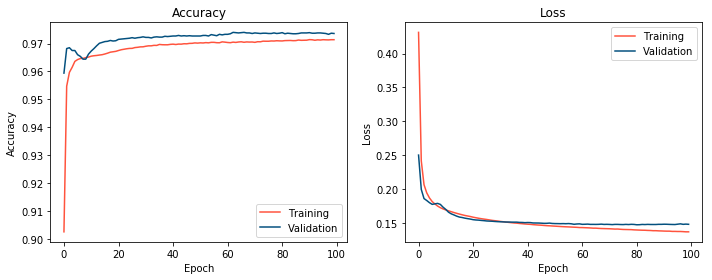

In [418]:
plot_metrics(fit.history,stop=100)    # with SGD lr=0.02

In [419]:
pred = model.predict_generator(my_predict_generator(X_test_scaled,16),
                               steps=len(X_test_scaled)/16,
                               verbose=1)

625/625 [==============================] - 2s 3ms/step


In [420]:
np.sum(np.argmax(pred,axis=1) == y_test.values)*100/len(y_test)

97.640000000000001

In [429]:
path_to_json_his = 'model_pca_tsne_scaled_whole_history.json'

In [430]:
with open(path_to_json_his,'w') as f:
    json.dump(fit.history,f)

In [431]:
path_to_json_model = 'model_pca_tsne_scaled_whole_json.json'

In [432]:
with open(path_to_json_model,'w') as f:
    json.dump(model.to_json(),f)
model.save_weights('model_pca_tense_scaled_whole_wts.h5')

In [433]:
with open(path_to_json_model,'r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('model_pca_tense_scaled_whole_wts.h5')

In [434]:
pred = model.predict_generator(my_predict_generator(X_test_scaled,16),
                               steps=len(X_test_scaled)/16,
                               verbose=1)

625/625 [==============================] - 2s 3ms/step


In [435]:
np.sum(np.argmax(pred,axis=1) == y_test.values)*100/len(y_test)

97.640000000000001

In [436]:
def evaluate_categorical_model(model,x_data,labels):
        
    predictions = model.predict_generator(my_predict_generator(x_data,16),
                                          steps=len(labels)/16,
                                          verbose=1)
        
    # use for multiclass
    pred_labels = np.argmax(predictions, axis=1)
    
    print()
    print(classification_report(labels, pred_labels))
    print()
    cm = confusion_matrix(labels, pred_labels)
#     sns.heatmap(cm, annot=True, fmt='g');
    return cm

In [437]:
cm = evaluate_categorical_model(model,X_test_scaled,y_test.values)

625/625 [==============================] - 1s 2ms/step

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       988
          1       0.98      0.99      0.98      1114
          2       0.98      0.97      0.98       962
          3       0.98      0.96      0.97      1000
          4       0.99      0.97      0.98       978
          5       0.97      0.98      0.98       906
          6       0.98      0.99      0.98      1015
          7       0.97      0.97      0.97      1063
          8       0.98      0.97      0.97       987
          9       0.95      0.97      0.96       987

avg / total       0.98      0.98      0.98     10000




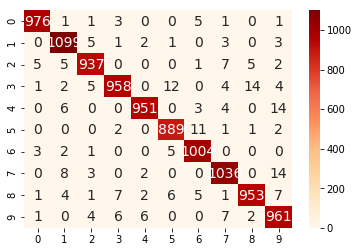

In [438]:
sns.heatmap(cm, annot=True, annot_kws={"size": 14},
            fmt='g', cmap='OrRd');

In [439]:
X_test_whole_scaled = X_test_whole/np.max(np.abs(X_test_whole),axis=0)
X_test_whole_scaled

array([[-0.28113756, -0.66209888],
       [-0.35881868,  0.2034809 ],
       [-0.54104054,  0.44323277],
       ..., 
       [-0.8059448 , -0.11413608],
       [ 0.06726696,  0.85263246],
       [ 0.01892789, -0.63048589]], dtype=float32)

In [451]:
pred_test = model.predict_generator(my_predict_generator(X_test_whole_scaled,16),
                                   steps=len(X_test_whole_scaled)/16,
                                   verbose=1)

625/625 [==============================] - 1s 2ms/step


In [452]:
pred_test

array([[  6.43995008e-04,   4.25945473e-04,   8.68704985e-04, ...,
          4.19179257e-03,   3.94851621e-03,   9.32230294e-01],
       [  1.88320737e-05,   4.21984645e-04,   9.80289400e-01, ...,
          2.70353747e-03,   2.97752376e-05,   1.45362865e-04],
       [  9.85442996e-01,   2.16655530e-06,   1.03729013e-02, ...,
          1.23918304e-04,   1.57349772e-04,   1.00726471e-03],
       ..., 
       [  1.78212133e-06,   5.85089310e-07,   4.76354944e-06, ...,
          3.59564758e-04,   8.02052600e-05,   5.20629995e-03],
       [  3.21447325e-04,   6.39778045e-06,   8.35400078e-06, ...,
          7.21229227e-08,   5.04057272e-04,   6.50388465e-05],
       [  3.53683427e-04,   3.25945928e-03,   7.42469728e-02, ...,
          8.90213490e-01,   1.32702971e-02,   1.41305495e-02]], dtype=float32)

In [453]:
pred_test_labels = np.argmax(pred_test,axis=1)
pred_test_labels

array([9, 2, 0, ..., 4, 6, 7])

In [448]:
pred_100_labels

array([8, 2, 0, ..., 4, 6, 7])

In [456]:
np.sum(pred_100_labels == pred_test_labels)*100/len(pred_100_labels)

88.480000000000004

In [233]:
def create_network():
    model = Sequential()
    model.add(Dense(units=512,input_shape=(2,),activation='relu',use_bias=True))
    # model.add(Dropout(0.1))
    model.add(Dense(units=512,activation='relu',use_bias=True))
    # model.add(Dropout(0.1))
    model.add(Dense(units=512,activation='relu',use_bias=True))
    model.add(Dense(units=10,activation='softmax',use_bias=True))
    
    model.compile(optimizer = optimizers.SGD(lr=0.02,momentum=0.9),loss = losses.categorical_crossentropy,metrics=['accuracy'])
    
    return model

In [ ]:
nn = KerasClassifier(build_fn=create_network,
                     epochs=100,
                     verbose=1)

In [309]:
X_str_test.shape

(10000, 2)

In [310]:
X_str_train.shape,y_str_train.shape

((50000, 2), (50000,))

In [318]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=42)

In [319]:
checkpoint = ModelCheckpoint('./model_pca_50_tsne_K_fold.h5',
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

In [322]:
fits = []
accuracies = []

Epoch 1/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.4197 - acc: 0.9065 - val_loss: 0.2611 - val_acc: 0.9587
Epoch 2/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2545 - acc: 0.9541 - val_loss: 0.2114 - val_acc: 0.9634
Epoch 3/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2139 - acc: 0.9596 - val_loss: 0.1937 - val_acc: 0.9636
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.2011 - acc: 0.9609 - val_loss: 0.1881 - val_acc: 0.9648
Epoch 5/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1942 - acc: 0.9618 - val_loss: 0.1807 - val_acc: 0.9664
Epoch 6/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1894 - acc: 0.9628 - val_loss: 0.1776 - val_acc: 0.9665
Epoch 7/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1858 - acc: 0.9631 - val_loss: 0.1739 - val_acc: 0.9675
Epoch 8/100
1250/1250 [===================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1617 - acc: 0.9678 - val_loss: 0.1595 - val_acc: 0.9699
Epoch 30/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1611 - acc: 0.9679 - val_loss: 0.1596 - val_acc: 0.9703
Epoch 31/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1607 - acc: 0.9679 - val_loss: 0.1588 - val_acc: 0.9709
Epoch 32/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1601 - acc: 0.9681 - val_loss: 0.1581 - val_acc: 0.9708
Epoch 33/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1596 - acc: 0.9678 - val_loss: 0.1584 - val_acc: 0.9709
Epoch 34/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.1592 - acc: 0.9680 - val_loss: 0.1582 - val_acc: 0.9707
Epoch 35/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.1587 - acc: 0.9682 - val_loss: 0.1578 - val_acc: 0.9705
Epoch 36/100
1250/1250 [=========================

Epoch 60/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.1507 - acc: 0.9692 - val_loss: 0.1549 - val_acc: 0.9708
Epoch 61/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.1504 - acc: 0.9691 - val_loss: 0.1553 - val_acc: 0.9708
Epoch 62/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1501 - acc: 0.9693 - val_loss: 0.1547 - val_acc: 0.9707
Epoch 63/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1499 - acc: 0.9693 - val_loss: 0.1550 - val_acc: 0.9708
Epoch 64/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1495 - acc: 0.9693 - val_loss: 0.1550 - val_acc: 0.9708
Epoch 65/100
1250/1250 [==============================] - 12s 9ms/step - loss: 0.1493 - acc: 0.9694 - val_loss: 0.1549 - val_acc: 0.9705
Epoch 66/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1492 - acc: 0.9694 - val_loss: 0.1550 - val_acc: 0.9705
Epoch 67/100
1250/1250 [=================

1250/1250 [==============================] - 11s 9ms/step - loss: 0.1443 - acc: 0.9698 - val_loss: 0.1541 - val_acc: 0.9707
Epoch 93/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1441 - acc: 0.9699 - val_loss: 0.1534 - val_acc: 0.9712
Epoch 94/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1440 - acc: 0.9699 - val_loss: 0.1537 - val_acc: 0.9713
Epoch 95/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1439 - acc: 0.9701 - val_loss: 0.1544 - val_acc: 0.9711
Epoch 96/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1439 - acc: 0.9699 - val_loss: 0.1541 - val_acc: 0.9711
Epoch 97/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1436 - acc: 0.9699 - val_loss: 0.1546 - val_acc: 0.9707
Epoch 98/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.1434 - acc: 0.9700 - val_loss: 0.1542 - val_acc: 0.9712
Epoch 99/100
1250/1250 [==============================

Epoch 24/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1642 - acc: 0.9673 - val_loss: 0.1614 - val_acc: 0.9698
Epoch 25/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1637 - acc: 0.9673 - val_loss: 0.1610 - val_acc: 0.9695
Epoch 26/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1630 - acc: 0.9675 - val_loss: 0.1609 - val_acc: 0.9697
Epoch 27/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1624 - acc: 0.9677 - val_loss: 0.1605 - val_acc: 0.9694
Epoch 28/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1618 - acc: 0.9676 - val_loss: 0.1601 - val_acc: 0.9695
Epoch 29/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1613 - acc: 0.9677 - val_loss: 0.1598 - val_acc: 0.9698
Epoch 30/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1608 - acc: 0.9678 - val_loss: 0.1596 - val_acc: 0.9696
Epoch 31/100
1250/1250 [==========

1250/1250 [==============================] - 13s 11ms/step - loss: 0.1515 - acc: 0.9688 - val_loss: 0.1566 - val_acc: 0.9707
Epoch 57/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1512 - acc: 0.9689 - val_loss: 0.1562 - val_acc: 0.9706
Epoch 58/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1510 - acc: 0.9688 - val_loss: 0.1560 - val_acc: 0.9708
Epoch 59/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1507 - acc: 0.9690 - val_loss: 0.1561 - val_acc: 0.9709
Epoch 60/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1504 - acc: 0.9692 - val_loss: 0.1559 - val_acc: 0.9708
Epoch 61/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1501 - acc: 0.9692 - val_loss: 0.1559 - val_acc: 0.9709
Epoch 62/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1499 - acc: 0.9692 - val_loss: 0.1556 - val_acc: 0.9710
Epoch 63/100
1250/1250 [=======================

1250/1250 [==============================] - 13s 11ms/step - loss: 0.1450 - acc: 0.9697 - val_loss: 0.1561 - val_acc: 0.9707
Epoch 89/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1447 - acc: 0.9698 - val_loss: 0.1555 - val_acc: 0.9707
Epoch 90/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1445 - acc: 0.9698 - val_loss: 0.1557 - val_acc: 0.9710
Epoch 91/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1443 - acc: 0.9697 - val_loss: 0.1555 - val_acc: 0.9711
Epoch 92/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1442 - acc: 0.9698 - val_loss: 0.1566 - val_acc: 0.9710
Epoch 93/100
1250/1250 [==============================] - 14s 12ms/step - loss: 0.1441 - acc: 0.9696 - val_loss: 0.1562 - val_acc: 0.9710
Epoch 94/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1439 - acc: 0.9699 - val_loss: 0.1569 - val_acc: 0.9709
Epoch 95/100
1250/1250 [=======================

Epoch 20/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1670 - acc: 0.9668 - val_loss: 0.1626 - val_acc: 0.9693
Epoch 21/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1662 - acc: 0.9671 - val_loss: 0.1620 - val_acc: 0.9693
Epoch 22/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1655 - acc: 0.9674 - val_loss: 0.1611 - val_acc: 0.9695
Epoch 23/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1648 - acc: 0.9675 - val_loss: 0.1613 - val_acc: 0.9695
Epoch 24/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1643 - acc: 0.9674 - val_loss: 0.1611 - val_acc: 0.9693
Epoch 25/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1638 - acc: 0.9675 - val_loss: 0.1605 - val_acc: 0.9695
Epoch 26/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1632 - acc: 0.9676 - val_loss: 0.1598 - val_acc: 0.9699
Epoch 27/100
1250/1250 [==========

1250/1250 [==============================] - 13s 10ms/step - loss: 0.1533 - acc: 0.9689 - val_loss: 0.1576 - val_acc: 0.9702
Epoch 53/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1529 - acc: 0.9688 - val_loss: 0.1573 - val_acc: 0.9702
Epoch 54/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1528 - acc: 0.9689 - val_loss: 0.1569 - val_acc: 0.9704
Epoch 55/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1524 - acc: 0.9688 - val_loss: 0.1573 - val_acc: 0.9700
Epoch 56/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1522 - acc: 0.9689 - val_loss: 0.1573 - val_acc: 0.9700
Epoch 57/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1520 - acc: 0.9690 - val_loss: 0.1562 - val_acc: 0.9709
Epoch 58/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1516 - acc: 0.9689 - val_loss: 0.1568 - val_acc: 0.9706
Epoch 59/100
1250/1250 [=======================

1250/1250 [==============================] - 13s 11ms/step - loss: 0.1458 - acc: 0.9699 - val_loss: 0.1564 - val_acc: 0.9703
Epoch 85/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1455 - acc: 0.9698 - val_loss: 0.1565 - val_acc: 0.9704
Epoch 86/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1453 - acc: 0.9700 - val_loss: 0.1571 - val_acc: 0.9706
Epoch 87/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1452 - acc: 0.9699 - val_loss: 0.1569 - val_acc: 0.9707
Epoch 88/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1450 - acc: 0.9699 - val_loss: 0.1569 - val_acc: 0.9704
Epoch 89/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1449 - acc: 0.9698 - val_loss: 0.1570 - val_acc: 0.9704
Epoch 90/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1447 - acc: 0.9700 - val_loss: 0.1566 - val_acc: 0.9705
Epoch 91/100
1250/1250 [=======================

Epoch 16/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1704 - acc: 0.9659 - val_loss: 0.1636 - val_acc: 0.9691
Epoch 17/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1694 - acc: 0.9662 - val_loss: 0.1629 - val_acc: 0.9692
Epoch 18/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1686 - acc: 0.9664 - val_loss: 0.1620 - val_acc: 0.9697
Epoch 19/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1677 - acc: 0.9666 - val_loss: 0.1623 - val_acc: 0.9694
Epoch 20/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1669 - acc: 0.9669 - val_loss: 0.1612 - val_acc: 0.9698
Epoch 21/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1663 - acc: 0.9670 - val_loss: 0.1613 - val_acc: 0.9697
Epoch 22/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1656 - acc: 0.9671 - val_loss: 0.1610 - val_acc: 0.9696
Epoch 23/100
1250/1250 [==========

1250/1250 [==============================] - 13s 10ms/step - loss: 0.1542 - acc: 0.9688 - val_loss: 0.1568 - val_acc: 0.9707
Epoch 49/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1539 - acc: 0.9689 - val_loss: 0.1569 - val_acc: 0.9708
Epoch 50/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1536 - acc: 0.9689 - val_loss: 0.1567 - val_acc: 0.9707
Epoch 51/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1532 - acc: 0.9690 - val_loss: 0.1564 - val_acc: 0.9704
Epoch 52/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1529 - acc: 0.9688 - val_loss: 0.1564 - val_acc: 0.9704
Epoch 53/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1526 - acc: 0.9689 - val_loss: 0.1563 - val_acc: 0.9703
Epoch 54/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1523 - acc: 0.9688 - val_loss: 0.1564 - val_acc: 0.9707
Epoch 55/100
1250/1250 [=======================

1250/1250 [==============================] - 13s 10ms/step - loss: 0.1463 - acc: 0.9698 - val_loss: 0.1548 - val_acc: 0.9703
Epoch 81/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1461 - acc: 0.9699 - val_loss: 0.1552 - val_acc: 0.9703
Epoch 82/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1461 - acc: 0.9700 - val_loss: 0.1552 - val_acc: 0.9702
Epoch 83/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1459 - acc: 0.9700 - val_loss: 0.1551 - val_acc: 0.9705
Epoch 84/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1457 - acc: 0.9700 - val_loss: 0.1552 - val_acc: 0.9702
Epoch 85/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1453 - acc: 0.9700 - val_loss: 0.1551 - val_acc: 0.9701
Epoch 86/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1453 - acc: 0.9699 - val_loss: 0.1553 - val_acc: 0.9701
Epoch 87/100
1250/1250 [=======================

Epoch 12/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1760 - acc: 0.9652 - val_loss: 0.1639 - val_acc: 0.9689
Epoch 13/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1746 - acc: 0.9652 - val_loss: 0.1629 - val_acc: 0.9688
Epoch 14/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1733 - acc: 0.9655 - val_loss: 0.1630 - val_acc: 0.9689
Epoch 15/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1723 - acc: 0.9655 - val_loss: 0.1622 - val_acc: 0.9688
Epoch 16/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1713 - acc: 0.9659 - val_loss: 0.1618 - val_acc: 0.9689
Epoch 17/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1704 - acc: 0.9660 - val_loss: 0.1613 - val_acc: 0.9691
Epoch 18/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1694 - acc: 0.9661 - val_loss: 0.1611 - val_acc: 0.9695
Epoch 19/100
1250/1250 [==========

1250/1250 [==============================] - 15s 12ms/step - loss: 0.1556 - acc: 0.9688 - val_loss: 0.1577 - val_acc: 0.9705
Epoch 45/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1555 - acc: 0.9687 - val_loss: 0.1574 - val_acc: 0.9708
Epoch 46/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1551 - acc: 0.9688 - val_loss: 0.1573 - val_acc: 0.9708
Epoch 47/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1547 - acc: 0.9688 - val_loss: 0.1575 - val_acc: 0.9708
Epoch 48/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1544 - acc: 0.9688 - val_loss: 0.1574 - val_acc: 0.9709
Epoch 49/100
1250/1250 [==============================] - 14s 12ms/step - loss: 0.1540 - acc: 0.9689 - val_loss: 0.1568 - val_acc: 0.9709
Epoch 50/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1536 - acc: 0.9689 - val_loss: 0.1568 - val_acc: 0.9709
Epoch 51/100
1250/1250 [=======================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1470 - acc: 0.9695 - val_loss: 0.1556 - val_acc: 0.9708
Epoch 77/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1469 - acc: 0.9696 - val_loss: 0.1555 - val_acc: 0.9708
Epoch 78/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1467 - acc: 0.9697 - val_loss: 0.1552 - val_acc: 0.9709
Epoch 79/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1465 - acc: 0.9696 - val_loss: 0.1557 - val_acc: 0.9706
Epoch 80/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1463 - acc: 0.9697 - val_loss: 0.1553 - val_acc: 0.9709
Epoch 81/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1461 - acc: 0.9698 - val_loss: 0.1569 - val_acc: 0.9706
Epoch 82/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1460 - acc: 0.9698 - val_loss: 0.1560 - val_acc: 0.9704
Epoch 83/100
1250/1250 [=======================

Epoch 8/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1822 - acc: 0.9637 - val_loss: 0.1720 - val_acc: 0.9675
Epoch 9/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1798 - acc: 0.9642 - val_loss: 0.1685 - val_acc: 0.9683
Epoch 10/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1781 - acc: 0.9643 - val_loss: 0.1669 - val_acc: 0.9684
Epoch 11/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1764 - acc: 0.9649 - val_loss: 0.1668 - val_acc: 0.9685
Epoch 12/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1752 - acc: 0.9648 - val_loss: 0.1665 - val_acc: 0.9690
Epoch 13/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1738 - acc: 0.9652 - val_loss: 0.1662 - val_acc: 0.9691
Epoch 14/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1724 - acc: 0.9653 - val_loss: 0.1665 - val_acc: 0.9688
Epoch 15/100
1250/1250 [============

1250/1250 [==============================] - 14s 11ms/step - loss: 0.1562 - acc: 0.9688 - val_loss: 0.1577 - val_acc: 0.9701
Epoch 41/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1559 - acc: 0.9687 - val_loss: 0.1575 - val_acc: 0.9698
Epoch 42/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1556 - acc: 0.9687 - val_loss: 0.1575 - val_acc: 0.9700
Epoch 43/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1552 - acc: 0.9688 - val_loss: 0.1577 - val_acc: 0.9701
Epoch 44/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1550 - acc: 0.9688 - val_loss: 0.1577 - val_acc: 0.9700
Epoch 45/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1546 - acc: 0.9688 - val_loss: 0.1573 - val_acc: 0.9697
Epoch 46/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1543 - acc: 0.9686 - val_loss: 0.1571 - val_acc: 0.9697
Epoch 47/100
1250/1250 [=======================

1250/1250 [==============================] - 14s 11ms/step - loss: 0.1478 - acc: 0.9695 - val_loss: 0.1535 - val_acc: 0.9710
Epoch 73/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1476 - acc: 0.9694 - val_loss: 0.1533 - val_acc: 0.9709
Epoch 74/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1472 - acc: 0.9696 - val_loss: 0.1533 - val_acc: 0.9708
Epoch 75/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1471 - acc: 0.9695 - val_loss: 0.1540 - val_acc: 0.9707
Epoch 76/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1469 - acc: 0.9695 - val_loss: 0.1541 - val_acc: 0.9705
Epoch 77/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1467 - acc: 0.9694 - val_loss: 0.1545 - val_acc: 0.9706
Epoch 78/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1466 - acc: 0.9695 - val_loss: 0.1535 - val_acc: 0.9711
Epoch 79/100
1250/1250 [=======================

Epoch 4/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.2005 - acc: 0.9612 - val_loss: 0.1840 - val_acc: 0.9659
Epoch 5/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1934 - acc: 0.9618 - val_loss: 0.1793 - val_acc: 0.9665
Epoch 6/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1888 - acc: 0.9627 - val_loss: 0.1756 - val_acc: 0.9673
Epoch 7/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1855 - acc: 0.9631 - val_loss: 0.1726 - val_acc: 0.9675
Epoch 8/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1828 - acc: 0.9634 - val_loss: 0.1691 - val_acc: 0.9680
Epoch 9/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1804 - acc: 0.9640 - val_loss: 0.1685 - val_acc: 0.9679
Epoch 10/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1785 - acc: 0.9644 - val_loss: 0.1674 - val_acc: 0.9684
Epoch 11/100
1250/1250 [================

1250/1250 [==============================] - 13s 11ms/step - loss: 0.1583 - acc: 0.9682 - val_loss: 0.1580 - val_acc: 0.9701
Epoch 37/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1579 - acc: 0.9683 - val_loss: 0.1578 - val_acc: 0.9700
Epoch 38/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1574 - acc: 0.9684 - val_loss: 0.1575 - val_acc: 0.9700
Epoch 39/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1570 - acc: 0.9683 - val_loss: 0.1572 - val_acc: 0.9701
Epoch 40/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1566 - acc: 0.9685 - val_loss: 0.1574 - val_acc: 0.9700
Epoch 41/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1562 - acc: 0.9684 - val_loss: 0.1569 - val_acc: 0.9703
Epoch 42/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1559 - acc: 0.9685 - val_loss: 0.1572 - val_acc: 0.9702
Epoch 43/100
1250/1250 [=======================

1250/1250 [==============================] - 14s 11ms/step - loss: 0.1484 - acc: 0.9696 - val_loss: 0.1539 - val_acc: 0.9706
Epoch 69/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1483 - acc: 0.9695 - val_loss: 0.1537 - val_acc: 0.9707
Epoch 70/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1481 - acc: 0.9695 - val_loss: 0.1540 - val_acc: 0.9711
Epoch 71/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1478 - acc: 0.9696 - val_loss: 0.1535 - val_acc: 0.9711
Epoch 72/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1475 - acc: 0.9696 - val_loss: 0.1539 - val_acc: 0.9709
Epoch 73/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1473 - acc: 0.9695 - val_loss: 0.1540 - val_acc: 0.9708
Epoch 74/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1472 - acc: 0.9696 - val_loss: 0.1538 - val_acc: 0.9713
Epoch 75/100
1250/1250 [=======================

1250/1250 [==============================] - 13s 11ms/step - loss: 0.1427 - acc: 0.9699 - val_loss: 0.1553 - val_acc: 0.9709
Best Model: 
epoch: 74 , val_acc: 0.9713 , val_loss: 0.153829269305
Epoch 1/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.4252 - acc: 0.9070 - val_loss: 0.2708 - val_acc: 0.9542
Epoch 2/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.2622 - acc: 0.9538 - val_loss: 0.2108 - val_acc: 0.9645
Epoch 3/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.2156 - acc: 0.9597 - val_loss: 0.1908 - val_acc: 0.9644
Epoch 4/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.2008 - acc: 0.9610 - val_loss: 0.1851 - val_acc: 0.9649
Epoch 5/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1942 - acc: 0.9619 - val_loss: 0.1805 - val_acc: 0.9662
Epoch 6/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1894 - acc: 0.9623 - val_loss: 0.1772 - v

Epoch 32/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1601 - acc: 0.9681 - val_loss: 0.1591 - val_acc: 0.9698
Epoch 33/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1596 - acc: 0.9681 - val_loss: 0.1583 - val_acc: 0.9698
Epoch 34/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1592 - acc: 0.9683 - val_loss: 0.1585 - val_acc: 0.9698
Epoch 35/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1587 - acc: 0.9684 - val_loss: 0.1583 - val_acc: 0.9697
Epoch 36/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1583 - acc: 0.9684 - val_loss: 0.1580 - val_acc: 0.9701
Epoch 37/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1578 - acc: 0.9686 - val_loss: 0.1576 - val_acc: 0.9701
Epoch 38/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1574 - acc: 0.9684 - val_loss: 0.1574 - val_acc: 0.9701
Epoch 39/100
1250/1250 [==========

1250/1250 [==============================] - 13s 11ms/step - loss: 0.1500 - acc: 0.9692 - val_loss: 0.1544 - val_acc: 0.9703
Epoch 65/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1496 - acc: 0.9693 - val_loss: 0.1544 - val_acc: 0.9703
Epoch 66/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1494 - acc: 0.9694 - val_loss: 0.1546 - val_acc: 0.9705
Epoch 67/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1493 - acc: 0.9693 - val_loss: 0.1543 - val_acc: 0.9706
Epoch 68/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1490 - acc: 0.9693 - val_loss: 0.1543 - val_acc: 0.9705
Epoch 69/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1487 - acc: 0.9694 - val_loss: 0.1547 - val_acc: 0.9707
Epoch 70/100
1250/1250 [==============================] - 13s 11ms/step - loss: 0.1485 - acc: 0.9694 - val_loss: 0.1544 - val_acc: 0.9705
Epoch 71/100
1250/1250 [=======================

1250/1250 [==============================] - 14s 11ms/step - loss: 0.1436 - acc: 0.9702 - val_loss: 0.1578 - val_acc: 0.9707
Epoch 97/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1434 - acc: 0.9702 - val_loss: 0.1575 - val_acc: 0.9708
Epoch 98/100
1250/1250 [==============================] - 15s 12ms/step - loss: 0.1434 - acc: 0.9702 - val_loss: 0.1578 - val_acc: 0.9705
Epoch 99/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1434 - acc: 0.9700 - val_loss: 0.1579 - val_acc: 0.9707
Epoch 100/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1430 - acc: 0.9703 - val_loss: 0.1579 - val_acc: 0.9708
Best Model: 
epoch: 76 , val_acc: 0.9711 , val_loss: 0.155318576422
Epoch 1/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.4198 - acc: 0.9081 - val_loss: 0.2665 - val_acc: 0.9557
Epoch 2/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2584 - acc: 0.9555 - val_loss: 0.228

Epoch 28/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1620 - acc: 0.9676 - val_loss: 0.1593 - val_acc: 0.9700
Epoch 29/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1614 - acc: 0.9678 - val_loss: 0.1590 - val_acc: 0.9699
Epoch 30/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1609 - acc: 0.9680 - val_loss: 0.1584 - val_acc: 0.9700
Epoch 31/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1605 - acc: 0.9679 - val_loss: 0.1585 - val_acc: 0.9705
Epoch 32/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1598 - acc: 0.9681 - val_loss: 0.1585 - val_acc: 0.9701
Epoch 33/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1594 - acc: 0.9682 - val_loss: 0.1584 - val_acc: 0.9701
Epoch 34/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1590 - acc: 0.9683 - val_loss: 0.1579 - val_acc: 0.9706
Epoch 35/100
1250/1250 [==========

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1506 - acc: 0.9691 - val_loss: 0.1561 - val_acc: 0.9705
Epoch 61/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1502 - acc: 0.9691 - val_loss: 0.1558 - val_acc: 0.9705
Epoch 62/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1501 - acc: 0.9691 - val_loss: 0.1558 - val_acc: 0.9703
Epoch 63/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1499 - acc: 0.9693 - val_loss: 0.1558 - val_acc: 0.9704
Epoch 64/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1495 - acc: 0.9694 - val_loss: 0.1558 - val_acc: 0.9706
Epoch 65/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1495 - acc: 0.9693 - val_loss: 0.1554 - val_acc: 0.9706
Epoch 66/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1492 - acc: 0.9693 - val_loss: 0.1555 - val_acc: 0.9705
Epoch 67/100
1250/1250 [=======================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1442 - acc: 0.9703 - val_loss: 0.1568 - val_acc: 0.9699
Epoch 93/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1441 - acc: 0.9701 - val_loss: 0.1564 - val_acc: 0.9705
Epoch 94/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1440 - acc: 0.9703 - val_loss: 0.1565 - val_acc: 0.9702
Epoch 95/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1438 - acc: 0.9704 - val_loss: 0.1572 - val_acc: 0.9698
Epoch 96/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1437 - acc: 0.9703 - val_loss: 0.1573 - val_acc: 0.9704
Epoch 97/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1436 - acc: 0.9702 - val_loss: 0.1575 - val_acc: 0.9701
Epoch 98/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1433 - acc: 0.9703 - val_loss: 0.1574 - val_acc: 0.9697
Epoch 99/100
1250/1250 [=======================

Epoch 24/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1647 - acc: 0.9673 - val_loss: 0.1624 - val_acc: 0.9690
Epoch 25/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1641 - acc: 0.9676 - val_loss: 0.1623 - val_acc: 0.9690
Epoch 26/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1634 - acc: 0.9677 - val_loss: 0.1616 - val_acc: 0.9688
Epoch 27/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1628 - acc: 0.9677 - val_loss: 0.1616 - val_acc: 0.9688
Epoch 28/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1622 - acc: 0.9677 - val_loss: 0.1612 - val_acc: 0.9690
Epoch 29/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1616 - acc: 0.9676 - val_loss: 0.1603 - val_acc: 0.9692
Epoch 30/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1610 - acc: 0.9678 - val_loss: 0.1594 - val_acc: 0.9696
Epoch 31/100
1250/1250 [==========

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1515 - acc: 0.9692 - val_loss: 0.1548 - val_acc: 0.9708
Epoch 57/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1512 - acc: 0.9692 - val_loss: 0.1557 - val_acc: 0.9708
Epoch 58/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1510 - acc: 0.9690 - val_loss: 0.1545 - val_acc: 0.9710
Epoch 59/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1507 - acc: 0.9689 - val_loss: 0.1546 - val_acc: 0.9709
Epoch 60/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1504 - acc: 0.9691 - val_loss: 0.1550 - val_acc: 0.9708
Epoch 61/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1502 - acc: 0.9691 - val_loss: 0.1546 - val_acc: 0.9710
Epoch 62/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1499 - acc: 0.9691 - val_loss: 0.1552 - val_acc: 0.9706
Epoch 63/100
1250/1250 [=======================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1446 - acc: 0.9700 - val_loss: 0.1549 - val_acc: 0.9704
Epoch 89/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1443 - acc: 0.9701 - val_loss: 0.1548 - val_acc: 0.9704
Epoch 90/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1441 - acc: 0.9699 - val_loss: 0.1553 - val_acc: 0.9704
Epoch 91/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1440 - acc: 0.9700 - val_loss: 0.1548 - val_acc: 0.9704
Epoch 92/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1439 - acc: 0.9701 - val_loss: 0.1550 - val_acc: 0.9705
Epoch 93/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1436 - acc: 0.9699 - val_loss: 0.1554 - val_acc: 0.9704
Epoch 94/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1434 - acc: 0.9700 - val_loss: 0.1555 - val_acc: 0.9704
Epoch 95/100
1250/1250 [=======================

Epoch 20/100
1250/1250 [==============================] - 14s 11ms/step - loss: 0.1667 - acc: 0.9670 - val_loss: 0.1626 - val_acc: 0.9693
Epoch 21/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1660 - acc: 0.9671 - val_loss: 0.1623 - val_acc: 0.9692
Epoch 22/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1652 - acc: 0.9673 - val_loss: 0.1629 - val_acc: 0.9693
Epoch 23/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1646 - acc: 0.9672 - val_loss: 0.1625 - val_acc: 0.9694
Epoch 24/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1639 - acc: 0.9673 - val_loss: 0.1623 - val_acc: 0.9692
Epoch 25/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1633 - acc: 0.9673 - val_loss: 0.1625 - val_acc: 0.9692
Epoch 26/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1626 - acc: 0.9675 - val_loss: 0.1619 - val_acc: 0.9691
Epoch 27/100
1250/1250 [==========

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1521 - acc: 0.9692 - val_loss: 0.1557 - val_acc: 0.9707
Epoch 53/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1518 - acc: 0.9693 - val_loss: 0.1557 - val_acc: 0.9708
Epoch 54/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1515 - acc: 0.9693 - val_loss: 0.1555 - val_acc: 0.9706
Epoch 55/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1512 - acc: 0.9693 - val_loss: 0.1556 - val_acc: 0.9706
Epoch 56/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1510 - acc: 0.9693 - val_loss: 0.1552 - val_acc: 0.9706
Epoch 57/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1507 - acc: 0.9694 - val_loss: 0.1549 - val_acc: 0.9707
Epoch 58/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1505 - acc: 0.9693 - val_loss: 0.1553 - val_acc: 0.9708
Epoch 59/100
1250/1250 [=======================

Epoch 84/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1449 - acc: 0.9700 - val_loss: 0.1539 - val_acc: 0.9712
Epoch 85/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1447 - acc: 0.9699 - val_loss: 0.1534 - val_acc: 0.9712
Epoch 86/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1445 - acc: 0.9697 - val_loss: 0.1540 - val_acc: 0.9712
Epoch 87/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1443 - acc: 0.9700 - val_loss: 0.1533 - val_acc: 0.9711
Epoch 88/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1442 - acc: 0.9700 - val_loss: 0.1540 - val_acc: 0.9711
Epoch 89/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1441 - acc: 0.9700 - val_loss: 0.1537 - val_acc: 0.9711
Epoch 90/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1439 - acc: 0.9700 - val_loss: 0.1536 - val_acc: 0.9713
Epoch 91/100
1250/1250 [==========

Epoch 16/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1713 - acc: 0.9656 - val_loss: 0.1624 - val_acc: 0.9682
Epoch 17/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1704 - acc: 0.9658 - val_loss: 0.1623 - val_acc: 0.9686
Epoch 18/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1695 - acc: 0.9661 - val_loss: 0.1624 - val_acc: 0.9689
Epoch 19/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1685 - acc: 0.9666 - val_loss: 0.1621 - val_acc: 0.9690
Epoch 20/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1677 - acc: 0.9668 - val_loss: 0.1617 - val_acc: 0.9689
Epoch 21/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1670 - acc: 0.9668 - val_loss: 0.1616 - val_acc: 0.9694
Epoch 22/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1661 - acc: 0.9670 - val_loss: 0.1601 - val_acc: 0.9694
Epoch 23/100
1250/1250 [==========

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1540 - acc: 0.9688 - val_loss: 0.1559 - val_acc: 0.9708
Epoch 49/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1537 - acc: 0.9689 - val_loss: 0.1557 - val_acc: 0.9708
Epoch 50/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1533 - acc: 0.9689 - val_loss: 0.1556 - val_acc: 0.9709
Epoch 51/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1531 - acc: 0.9691 - val_loss: 0.1554 - val_acc: 0.9709
Epoch 52/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1528 - acc: 0.9691 - val_loss: 0.1554 - val_acc: 0.9709
Epoch 53/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1525 - acc: 0.9691 - val_loss: 0.1550 - val_acc: 0.9709
Epoch 54/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1522 - acc: 0.9690 - val_loss: 0.1553 - val_acc: 0.9709
Epoch 55/100
1250/1250 [=======================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1463 - acc: 0.9698 - val_loss: 0.1547 - val_acc: 0.9711
Epoch 81/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1462 - acc: 0.9699 - val_loss: 0.1542 - val_acc: 0.9711
Epoch 82/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1459 - acc: 0.9700 - val_loss: 0.1549 - val_acc: 0.9710
Epoch 83/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1457 - acc: 0.9701 - val_loss: 0.1549 - val_acc: 0.9712
Epoch 84/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1455 - acc: 0.9700 - val_loss: 0.1545 - val_acc: 0.9710
Epoch 85/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1454 - acc: 0.9698 - val_loss: 0.1543 - val_acc: 0.9710
Epoch 86/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1451 - acc: 0.9699 - val_loss: 0.1545 - val_acc: 0.9710
Epoch 87/100
1250/1250 [=======================

Epoch 12/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1761 - acc: 0.9650 - val_loss: 0.1652 - val_acc: 0.9686
Epoch 13/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1748 - acc: 0.9651 - val_loss: 0.1641 - val_acc: 0.9686
Epoch 14/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1736 - acc: 0.9653 - val_loss: 0.1644 - val_acc: 0.9685
Epoch 15/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1724 - acc: 0.9657 - val_loss: 0.1638 - val_acc: 0.9684
Epoch 16/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1714 - acc: 0.9661 - val_loss: 0.1635 - val_acc: 0.9688
Epoch 17/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1704 - acc: 0.9660 - val_loss: 0.1631 - val_acc: 0.9686
Epoch 18/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1694 - acc: 0.9661 - val_loss: 0.1630 - val_acc: 0.9687
Epoch 19/100
1250/1250 [==========

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1551 - acc: 0.9688 - val_loss: 0.1565 - val_acc: 0.9706
Epoch 45/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1546 - acc: 0.9689 - val_loss: 0.1567 - val_acc: 0.9702
Epoch 46/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1543 - acc: 0.9688 - val_loss: 0.1566 - val_acc: 0.9703
Epoch 47/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1540 - acc: 0.9688 - val_loss: 0.1565 - val_acc: 0.9705
Epoch 48/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1537 - acc: 0.9687 - val_loss: 0.1567 - val_acc: 0.9704
Epoch 49/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1534 - acc: 0.9687 - val_loss: 0.1558 - val_acc: 0.9705
Epoch 50/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1532 - acc: 0.9687 - val_loss: 0.1562 - val_acc: 0.9704
Epoch 51/100
1250/1250 [=======================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1470 - acc: 0.9694 - val_loss: 0.1557 - val_acc: 0.9703
Epoch 77/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1467 - acc: 0.9697 - val_loss: 0.1549 - val_acc: 0.9705
Epoch 78/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1465 - acc: 0.9697 - val_loss: 0.1547 - val_acc: 0.9705
Epoch 79/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1464 - acc: 0.9698 - val_loss: 0.1554 - val_acc: 0.9706
Epoch 80/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1464 - acc: 0.9696 - val_loss: 0.1548 - val_acc: 0.9708
Epoch 81/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1461 - acc: 0.9697 - val_loss: 0.1551 - val_acc: 0.9709
Epoch 82/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1460 - acc: 0.9698 - val_loss: 0.1553 - val_acc: 0.9706
Epoch 83/100
1250/1250 [=======================

Epoch 8/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1824 - acc: 0.9633 - val_loss: 0.1722 - val_acc: 0.9665
Epoch 9/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1804 - acc: 0.9640 - val_loss: 0.1694 - val_acc: 0.9676
Epoch 10/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1784 - acc: 0.9645 - val_loss: 0.1677 - val_acc: 0.9683
Epoch 11/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1768 - acc: 0.9648 - val_loss: 0.1668 - val_acc: 0.9684
Epoch 12/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1755 - acc: 0.9650 - val_loss: 0.1665 - val_acc: 0.9683
Epoch 13/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1740 - acc: 0.9652 - val_loss: 0.1660 - val_acc: 0.9682
Epoch 14/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1728 - acc: 0.9654 - val_loss: 0.1657 - val_acc: 0.9690
Epoch 15/100
1250/1250 [============

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1570 - acc: 0.9683 - val_loss: 0.1568 - val_acc: 0.9705
Epoch 41/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1566 - acc: 0.9684 - val_loss: 0.1574 - val_acc: 0.9700
Epoch 42/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1562 - acc: 0.9685 - val_loss: 0.1567 - val_acc: 0.9704
Epoch 43/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1560 - acc: 0.9684 - val_loss: 0.1566 - val_acc: 0.9702
Epoch 44/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1557 - acc: 0.9683 - val_loss: 0.1571 - val_acc: 0.9701
Epoch 45/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1554 - acc: 0.9684 - val_loss: 0.1572 - val_acc: 0.9700
Epoch 46/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1550 - acc: 0.9685 - val_loss: 0.1565 - val_acc: 0.9701
Epoch 47/100
1250/1250 [=======================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1481 - acc: 0.9696 - val_loss: 0.1568 - val_acc: 0.9700
Epoch 73/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1479 - acc: 0.9696 - val_loss: 0.1564 - val_acc: 0.9697
Epoch 74/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1476 - acc: 0.9697 - val_loss: 0.1567 - val_acc: 0.9701
Epoch 75/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1473 - acc: 0.9697 - val_loss: 0.1566 - val_acc: 0.9703
Epoch 76/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1471 - acc: 0.9697 - val_loss: 0.1567 - val_acc: 0.9702
Epoch 77/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1469 - acc: 0.9697 - val_loss: 0.1572 - val_acc: 0.9702
Epoch 78/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1467 - acc: 0.9697 - val_loss: 0.1569 - val_acc: 0.9702
Epoch 79/100
1250/1250 [=======================

Epoch 4/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2041 - acc: 0.9616 - val_loss: 0.1856 - val_acc: 0.9656
Epoch 5/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1940 - acc: 0.9617 - val_loss: 0.1811 - val_acc: 0.9663
Epoch 6/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1888 - acc: 0.9623 - val_loss: 0.1771 - val_acc: 0.9666
Epoch 7/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1853 - acc: 0.9627 - val_loss: 0.1747 - val_acc: 0.9666
Epoch 8/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1825 - acc: 0.9634 - val_loss: 0.1707 - val_acc: 0.9674
Epoch 9/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1801 - acc: 0.9639 - val_loss: 0.1693 - val_acc: 0.9679
Epoch 10/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1784 - acc: 0.9644 - val_loss: 0.1679 - val_acc: 0.9680
Epoch 11/100
1250/1250 [================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1579 - acc: 0.9683 - val_loss: 0.1589 - val_acc: 0.9703
Epoch 37/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1575 - acc: 0.9684 - val_loss: 0.1590 - val_acc: 0.9704
Epoch 38/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1572 - acc: 0.9684 - val_loss: 0.1591 - val_acc: 0.9705
Epoch 39/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1568 - acc: 0.9685 - val_loss: 0.1588 - val_acc: 0.9704
Epoch 40/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1563 - acc: 0.9684 - val_loss: 0.1585 - val_acc: 0.9705
Epoch 41/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1561 - acc: 0.9686 - val_loss: 0.1585 - val_acc: 0.9704
Epoch 42/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1557 - acc: 0.9686 - val_loss: 0.1582 - val_acc: 0.9704
Epoch 43/100
1250/1250 [=======================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1485 - acc: 0.9696 - val_loss: 0.1561 - val_acc: 0.9706
Epoch 69/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1483 - acc: 0.9697 - val_loss: 0.1557 - val_acc: 0.9709
Epoch 70/100
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1482 - acc: 0.9694 - val_loss: 0.1555 - val_acc: 0.9709
Epoch 71/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1479 - acc: 0.9695 - val_loss: 0.1558 - val_acc: 0.9710
Epoch 72/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1476 - acc: 0.9696 - val_loss: 0.1556 - val_acc: 0.9709
Epoch 73/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1475 - acc: 0.9696 - val_loss: 0.1562 - val_acc: 0.9708
Epoch 74/100
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1473 - acc: 0.9698 - val_loss: 0.1564 - val_acc: 0.9708
Epoch 75/100
1250/1250 [=======================

1250/1250 [==============================] - 12s 10ms/step - loss: 0.1430 - acc: 0.9700 - val_loss: 0.1572 - val_acc: 0.9707
Best Model: 
epoch: 88 , val_acc: 0.9711 , val_loss: 0.156956433147


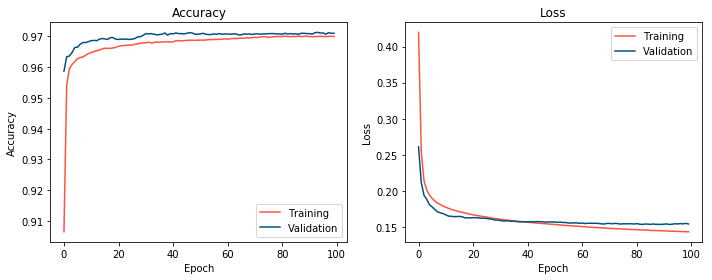

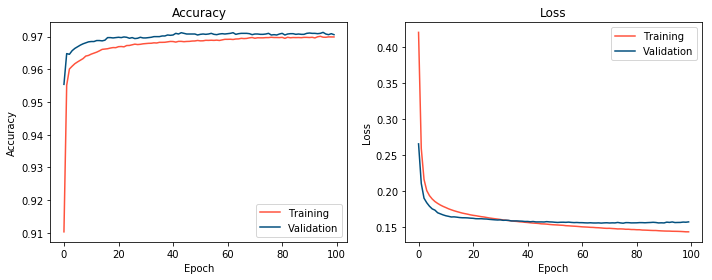

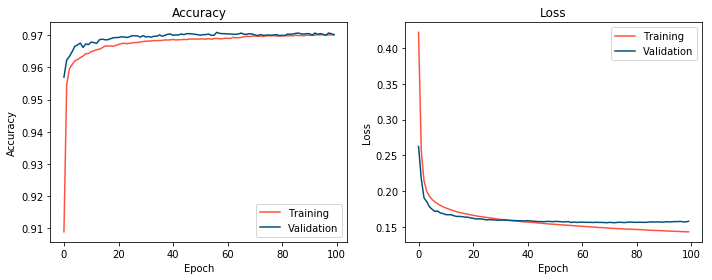

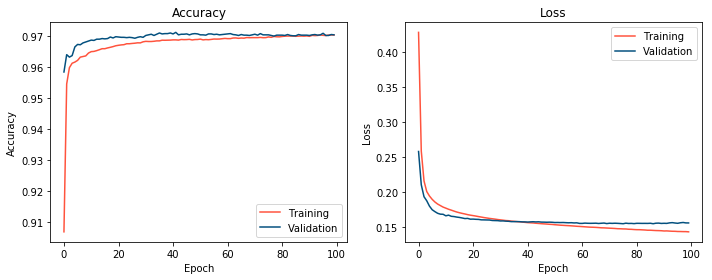

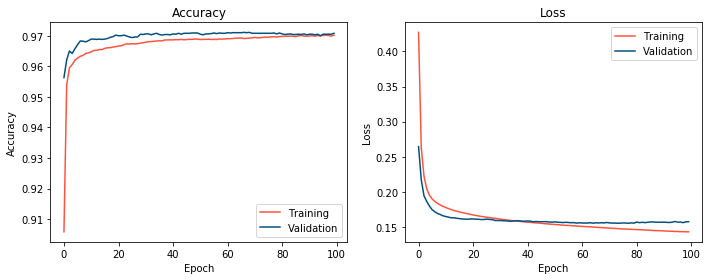

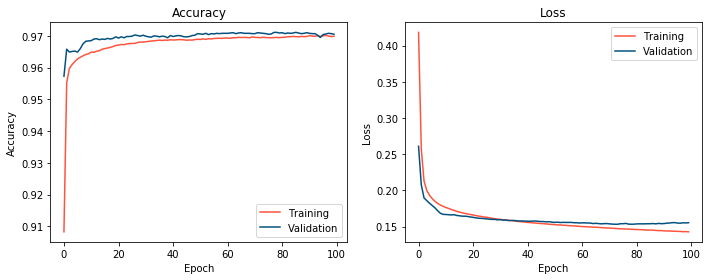

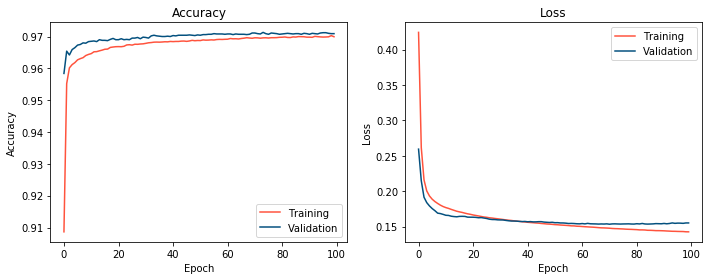

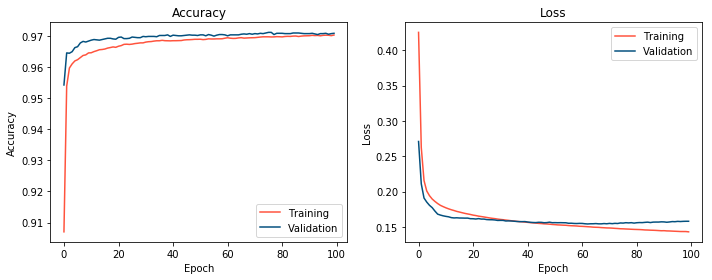

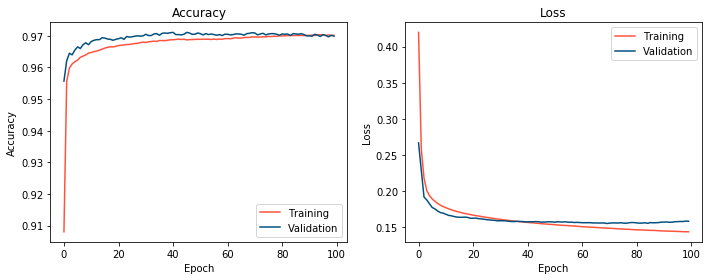

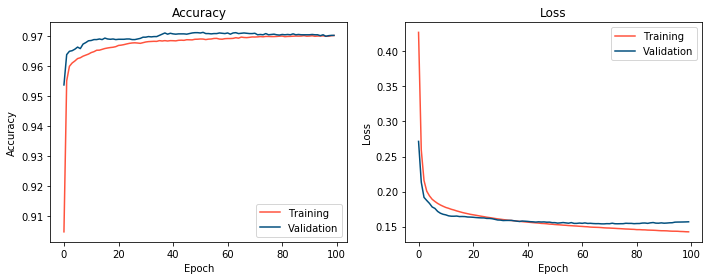

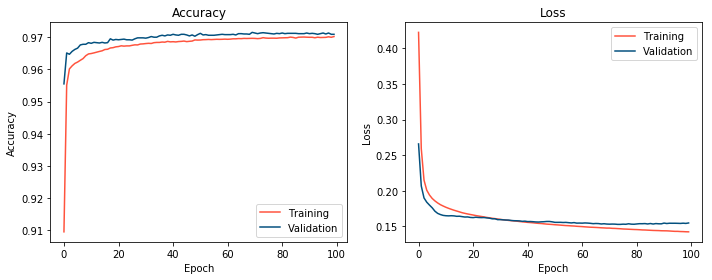

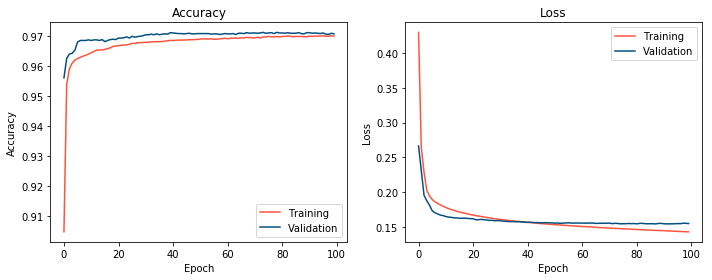

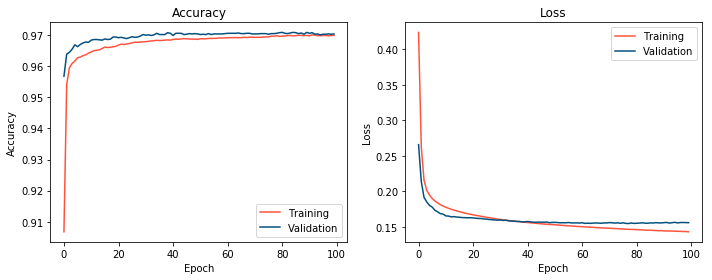

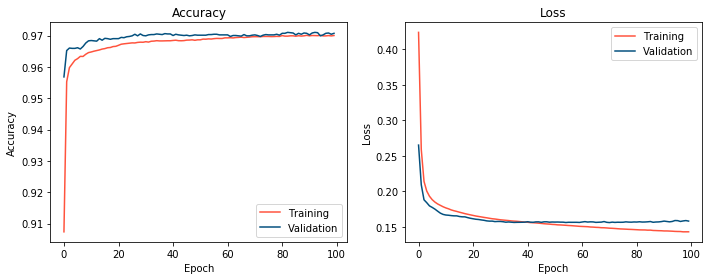

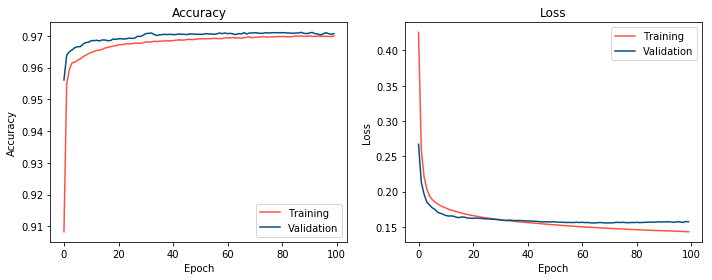

In [323]:
for train_index, test_index in rskf.split(X_str_train, y_str_train):
#         print("TRAIN:", train_index, "TEST:", test_index)
    X_train_str, X_test_str = X_str_train[train_index], X_str_train[test_index]
    y_train_str, y_test_str = y_str_train[train_index], y_str_train[test_index]
#         print(X_train_str.shape,X_test_str.shape)
    model = create_network()
    fit = model.fit_generator(my_generator(X_train_scaled,to_categorical(y_train.values),32),
                              steps_per_epoch=len(X_train_scaled)/32,
                              epochs=100,
                              validation_data=my_generator(X_val_scaled,to_categorical(y_val.values),16),
                              validation_steps=len(X_val_scaled)/16,
                              callbacks=[checkpoint,tensorboard]
                             )
    fits.append(fit)
    accuracy = np.max(fit.history['val_acc'])
    accuracies.append(accuracy)
    plot_metrics(fit.history,stop=100)

In [341]:
accuracies

[0.97130000000000005,
 0.97130000000000005,
 0.97089999999999999,
 0.97119999999999995,
 0.97109999999999996,
 0.97109999999999996,
 0.97130000000000005,
 0.97109999999999996,
 0.97109999999999996,
 0.97119999999999995,
 0.97150000000000003,
 0.97130000000000005,
 0.97089999999999999,
 0.97099999999999997,
 0.97109999999999996]

In [325]:
from IPython.display import clear_output

Best Model: 
epoch: 94 , val_acc: 0.9713 , val_loss: 0.15365221865
Enter q or cc
Best Model: 
epoch: 96 , val_acc: 0.9713 , val_loss: 0.156151395644
Enter q or cc
Best Model: 
epoch: 57 , val_acc: 0.9709 , val_loss: 0.156172576669
Enter q or cc
Best Model: 
epoch: 42 , val_acc: 0.9712 , val_loss: 0.157309576681
Enter q or cc
Best Model: 
epoch: 67 , val_acc: 0.9711 , val_loss: 0.155569935471
Enter q or cc
Best Model: 
epoch: 78 , val_acc: 0.9711 , val_loss: 0.153463887577
Enter q or cc
Best Model: 
epoch: 74 , val_acc: 0.9713 , val_loss: 0.153829269305
Enter q or cc
Best Model: 
epoch: 76 , val_acc: 0.9711 , val_loss: 0.155318576422
Enter q or cc
Best Model: 
epoch: 41 , val_acc: 0.9711 , val_loss: 0.156905660723
Enter q or cc
Best Model: 
epoch: 52 , val_acc: 0.9712 , val_loss: 0.154934240536
Enter q or cc
Best Model: 
epoch: 70 , val_acc: 0.9715 , val_loss: 0.153289274976
Enter q or cc
Best Model: 
epoch: 74 , val_acc: 0.9713 , val_loss: 0.154791686419
Enter q or cc
Best Model: 
epoc

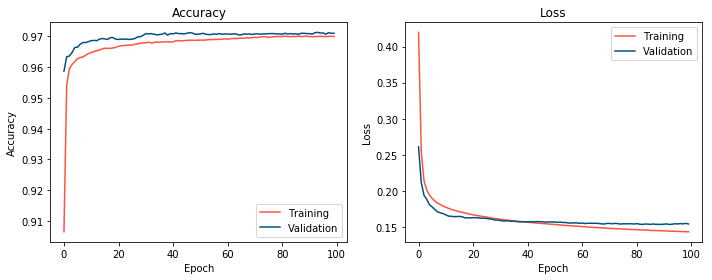

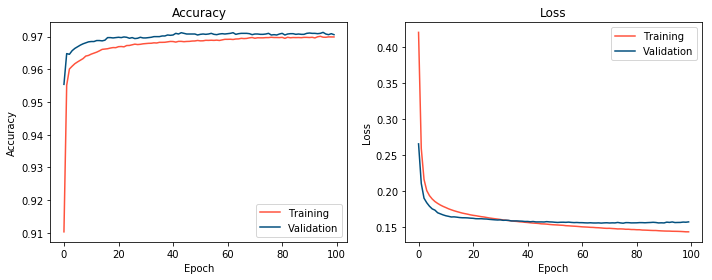

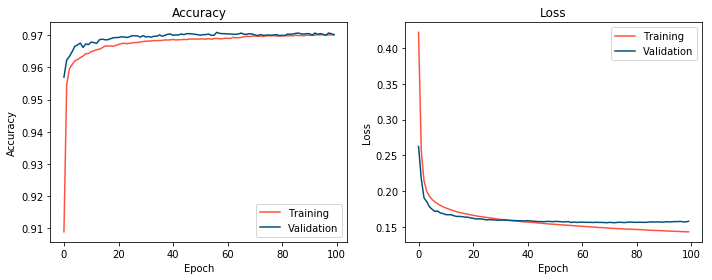

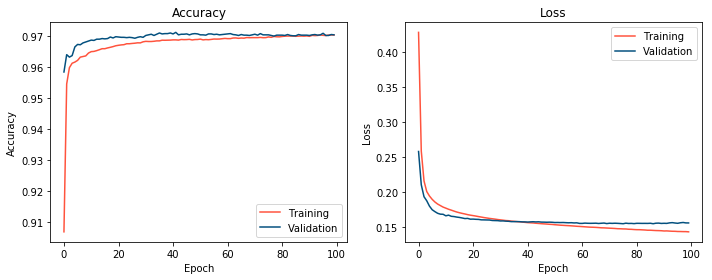

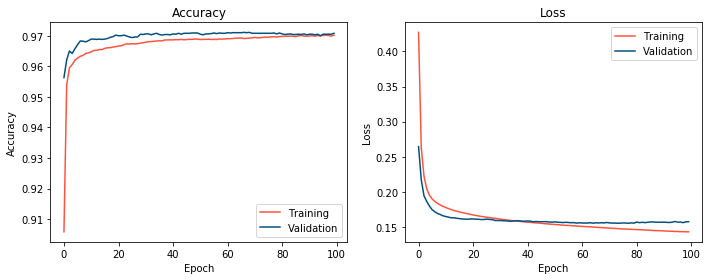

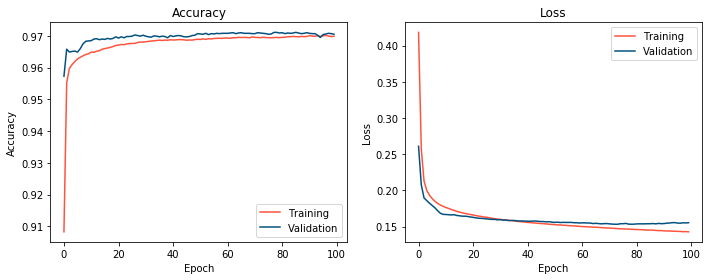

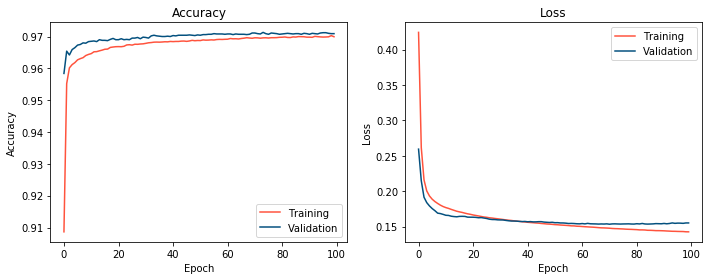

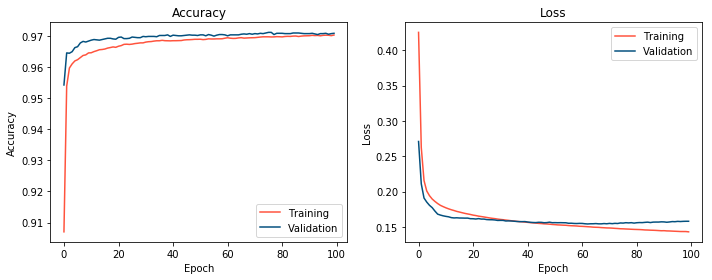

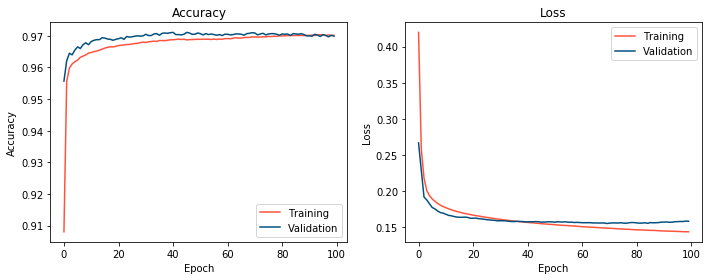

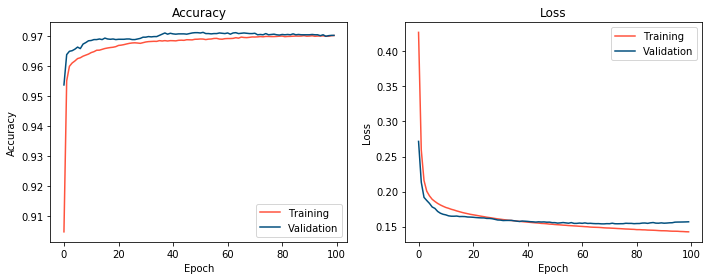

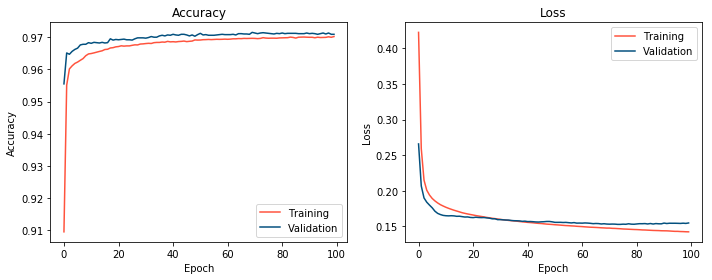

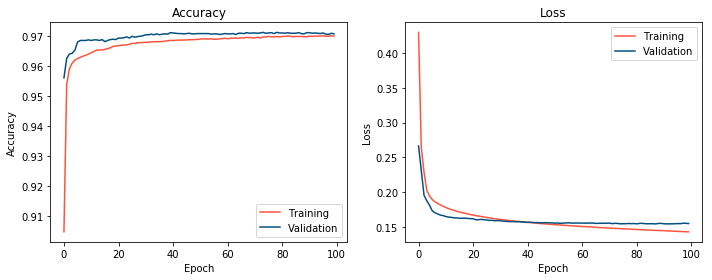

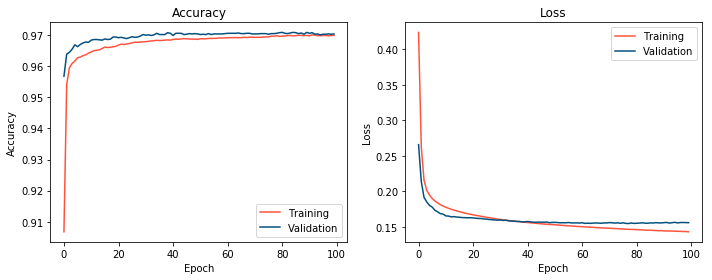

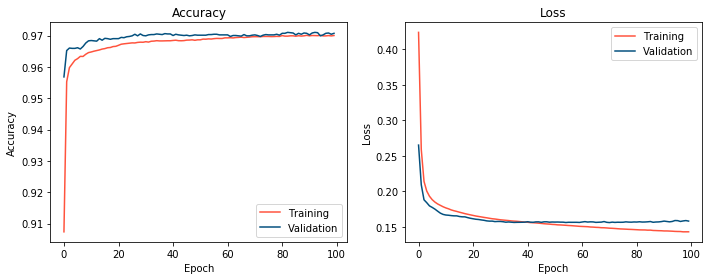

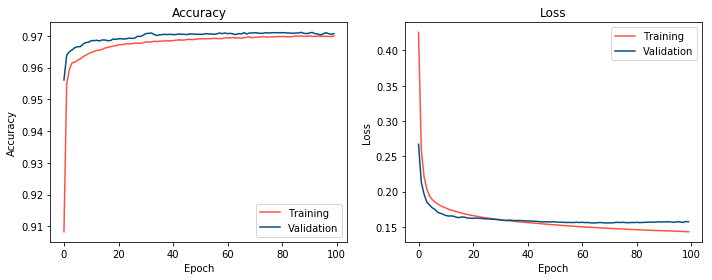

In [326]:
for fit in fits:
    plot_metrics(fit.history,stop=100)
    num = input('Enter q or c')
    if num == 'q':
        break

In [328]:
model_K_fold = load_model('model_pca_50_tsne_K_fold.h5')

In [359]:
cm = evaluate_categorical_model(model,X_test_scaled,y_test.values)

625/625 [==============================] - 1s 2ms/step

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       988
          1       0.97      0.99      0.98      1114
          2       0.98      0.96      0.97       962
          3       0.98      0.96      0.97      1000
          4       0.98      0.97      0.98       978
          5       0.96      0.97      0.97       906
          6       0.98      0.99      0.98      1015
          7       0.98      0.96      0.97      1063
          8       0.97      0.96      0.96       987
          9       0.95      0.97      0.96       987

avg / total       0.97      0.97      0.97     10000




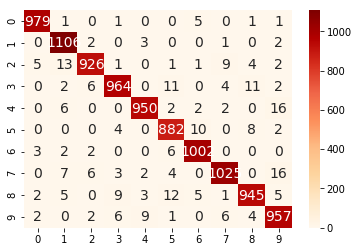

In [360]:
sns.heatmap(cm, annot=True, annot_kws={"size": 14},
            fmt='g', cmap='OrRd');

In [363]:
X_test_data = pd.read_csv('Test_Data.csv')
X_test_data.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.0000,0.5100,0.0,0.0,0.0,0.000,0.0,0.00000,0.0000,0.9920,...,0.0,0.0,0.0000,0.04315,0.0,0.0,0.0000,0.0,0.9920,0.34100
1,0.0000,0.7410,0.0,0.0,0.0,0.000,0.0,0.82000,0.0000,0.9214,...,0.0,0.0,0.9960,0.00000,0.0,0.0,0.0000,0.0,0.9960,0.05884
2,0.9136,0.6313,0.0,0.0,0.0,0.961,0.0,0.72950,0.0000,0.0000,...,0.0,0.0,0.0000,0.19600,0.0,0.0,0.2666,0.0,0.0000,0.27440
3,0.9414,0.0000,0.0,0.0,0.0,0.000,0.0,0.64300,0.4158,0.1333,...,0.0,0.0,0.1490,0.99600,0.0,0.0,0.9960,0.0,0.0000,0.99600
4,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.00000,0.0000,0.2864,...,0.0,0.0,0.0000,0.15300,0.0,0.0,0.9920,0.0,0.9960,0.96100
5,0.0000,0.7256,0.0,0.0,0.0,0.000,0.0,0.00000,0.0000,0.4548,...,0.0,0.0,0.9920,0.99200,0.0,0.0,0.0000,0.0,0.9883,0.98830
6,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.03137,0.0000,0.6080,...,0.0,0.0,0.0000,0.05490,0.0,0.0,0.4863,0.0,0.0902,0.48240
7,0.9883,0.0000,0.0,0.0,0.0,0.000,0.0,0.00000,0.9883,0.0000,...,0.0,0.0,0.9883,1.00000,0.0,0.0,0.0000,0.0,0.0000,0.37650
8,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.00000,0.0000,0.9490,...,0.0,0.0,0.4746,0.53700,0.0,0.0,0.9920,0.0,0.9920,0.99200
9,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.99200,0.0000,0.9920,...,0.0,0.0,0.9920,0.00000,0.0,0.0,0.5690,0.0,0.0000,0.00000


In [364]:
for col in X_test_data.columns:
    if X_test_data[col].dtype == np.int64:
        print(col)

In [365]:
for col in df.columns[1:]:
    if max(df[col]) > 1:
        print(max(df[col]))

In [366]:
X_test_data_values = X_test_data.values
X_test_data_values

array([[ 0.     ,  0.51   ,  0.     , ...,  0.     ,  0.992  ,  0.341  ],
       [ 0.     ,  0.741  ,  0.     , ...,  0.     ,  0.996  ,  0.05884],
       [ 0.9136 ,  0.6313 ,  0.     , ...,  0.     ,  0.     ,  0.2744 ],
       ..., 
       [ 0.     ,  0.     ,  0.2627 , ...,  0.     ,  0.08234,  0.     ],
       [ 0.5254 ,  0.     ,  0.     , ...,  0.     ,  0.992  ,  0.992  ],
       [ 0.     ,  1.     ,  0.     , ...,  0.     ,  0.749  ,  1.     ]])

In [ ]:
X_test_data_values_100 = pca

In [297]:
X_test_data_values = pca_50.transform(X_test_data_values)
X_test_data_values

array([[ -2.72682011e+00,  -9.57463647e-02,   2.09495832e+00, ...,
         -6.61196695e-01,   2.43432980e-03,   2.67795267e-01],
       [  5.33900815e-01,  -2.60152211e+00,   1.12214034e+00, ...,
          1.35458167e-01,   1.51192665e+00,   2.79707697e-01],
       [  2.23144508e+00,  -6.65710871e-01,   3.61888381e+00, ...,
         -7.38275871e-01,   7.37217518e-02,  -2.27040539e-01],
       ..., 
       [ -4.30335280e-02,   2.04361273e+00,  -1.03047473e+00, ...,
          4.05683529e-01,  -2.71445897e-02,  -5.86833040e-01],
       [  3.21625786e+00,   1.15751994e+00,  -4.65220152e-02, ...,
          2.15933411e-01,   3.51919628e-02,  -1.12393879e+00],
       [ -1.74646701e+00,   5.75138996e-01,   1.44495523e+00, ...,
         -1.62766356e-01,  -4.03270564e-01,   1.87396338e-01]])

In [294]:
tsne_pca

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=600,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [298]:
X_test_data_values_tsne = tsne_pca.fit_transform(X_test_data_values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.237s...
[t-SNE] Computed neighbors for 10000 samples in 14.969s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.839843
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.627182
[t-SNE] Error after 1000 iterations: 1.649739


In [348]:
np.max(np.abs(X_test_data_values_tsne),axis=0)

array([ 83.27616119,  79.59544373], dtype=float32)

In [349]:
X_test_data_values_tsne/np.max(np.abs(X_test_data_values_tsne),axis=0)

array([[-0.11149413, -0.37224346],
       [-0.59729242,  0.56890404],
       [ 0.76653677,  0.25356814],
       ..., 
       [ 0.2772257 , -0.66410178],
       [ 0.80873781, -0.2198332 ],
       [-0.35684183, -0.28759536]], dtype=float32)

In [350]:
X_test_data_values_tsne_scaled = X_test_data_values_tsne/np.max(np.abs(X_test_data_values_tsne),axis=0)
X_test_data_values_tsne_scaled

array([[-0.11149413, -0.37224346],
       [-0.59729242,  0.56890404],
       [ 0.76653677,  0.25356814],
       ..., 
       [ 0.2772257 , -0.66410178],
       [ 0.80873781, -0.2198332 ],
       [-0.35684183, -0.28759536]], dtype=float32)

In [351]:
np.max(X_test_data_values_tsne_scaled)

1.0

In [299]:
with open('model_pca_tsne_scaled_json.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('model_pca_tense_scaled_wts.h5')

In [339]:
model

In [340]:
model_K_fold

In [ ]:
cm = evaluate_categorical_model(model,X_test_scaled,y_test.values)

In [337]:
cm = evaluate_categorical_model(model_K_fold,X_test_scaled,y_test.values)

625/625 [==============================] - 1s 2ms/step

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       988
          1       0.97      0.99      0.98      1114
          2       0.99      0.96      0.97       962
          3       0.98      0.96      0.97      1000
          4       0.98      0.97      0.98       978
          5       0.97      0.97      0.97       906
          6       0.98      0.99      0.98      1015
          7       0.97      0.97      0.97      1063
          8       0.97      0.96      0.96       987
          9       0.95      0.97      0.96       987

avg / total       0.97      0.97      0.97     10000




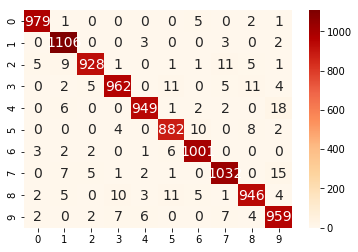

In [338]:
sns.heatmap(cm, annot=True, annot_kws={"size": 14},
            fmt='g', cmap='OrRd');

In [352]:
pred_normal = model.predict_generator(my_predict_generator(X_test_data_values_tsne_scaled,16),
                               steps=len(X_test_data_values_tsne_scaled)/16,
                               verbose=1)

625/625 [==============================] - 1s 2ms/step


In [353]:
pred_normal

array([[  4.44089274e-05,   7.95885535e-06,   4.68788145e-04, ...,
          4.89799675e-07,   3.48211196e-03,   1.28145737e-04],
       [  4.75125125e-04,   9.04099941e-01,   1.90928876e-02, ...,
          1.92668959e-02,   2.41752341e-02,   1.71568636e-02],
       [  2.07942847e-07,   2.70630471e-06,   1.19095013e-07, ...,
          4.11757297e-04,   1.16587260e-04,   9.98607953e-04],
       ..., 
       [  9.89681542e-01,   3.28754213e-05,   1.06197665e-03, ...,
          2.81253509e-04,   9.69102955e-04,   2.77285767e-03],
       [  1.24434710e-05,   1.03882707e-08,   5.65006076e-06, ...,
          2.06399520e-04,   1.80791609e-03,   4.76580746e-02],
       [  5.00811802e-05,   7.66112680e-06,   1.32576074e-03, ...,
          2.87493585e-05,   1.25474483e-02,   1.55009180e-01]], dtype=float32)

In [354]:
pred_labels_normal = np.argmax(pred,axis=1)
pred_labels_normal

array([4, 1, 4, ..., 0, 4, 1])

In [355]:
pred = model_K_fold.predict_generator(my_predict_generator(X_test_data_values_tsne_scaled,16),
                               steps=len(X_test_data_values_tsne_scaled)/16,
                               verbose=1)

625/625 [==============================] - 1s 2ms/step


In [356]:
pred

array([[  1.23422637e-04,   5.48645003e-05,   9.63988015e-04, ...,
          7.48096568e-07,   1.16457772e-02,   4.76203248e-04],
       [  3.00838059e-04,   9.03127313e-01,   2.52724178e-02, ...,
          2.25563366e-02,   2.41194330e-02,   1.05711212e-02],
       [  5.67189488e-07,   8.00204289e-05,   1.13306551e-05, ...,
          4.02078556e-04,   2.26286560e-04,   1.09163055e-03],
       ..., 
       [  9.84059334e-01,   1.87136146e-04,   2.56550801e-03, ...,
          4.79625771e-04,   2.13632453e-03,   6.26689568e-03],
       [  1.00091813e-04,   9.95780510e-07,   1.66426951e-04, ...,
          4.63413657e-04,   5.27879875e-03,   5.47881834e-02],
       [  2.90866446e-04,   2.96432900e-05,   1.59681379e-03, ...,
          6.59994184e-05,   1.97973177e-02,   1.99795619e-01]], dtype=float32)

In [357]:
pred_labels = np.argmax(pred,axis=1)
pred_labels

array([5, 1, 4, ..., 0, 4, 3])

In [358]:
np.sum(pred_labels == pred_labels_normal)*100/len(pred_labels)

37.810000000000002

In [336]:
df_to_save = pd.DataFrame(data=pred_labels,columns=['label'])
df_to_save

,label
0,4
1,1
2,4
3,4
4,4
5,1
6,4
7,4
8,4
9,8


In [308]:
df_to_save.to_csv('submission.csv')

In [362]:
model_100 = load_model('model_pca_100.h5')

In [369]:
X_test_data_pca = pca_100.transform(X_test_data_values)

In [370]:
X_test_data_pca

array([[-2.72682011, -0.09574636,  2.09495832, ..., -0.17322769,
        -0.20865293, -0.15724842],
       [ 0.53390082, -2.60152211,  1.12214035, ..., -0.17159534,
        -0.01546628,  0.0887474 ],
       [ 2.23144508, -0.66571087,  3.61888381, ...,  0.02886693,
         0.91329033,  0.19350988],
       ..., 
       [-0.04303353,  2.04361273, -1.03047473, ...,  0.01612755,
         0.35441591,  0.0263004 ],
       [ 3.21625786,  1.15751994, -0.04652202, ...,  0.25820663,
        -0.20789469, -0.26408709],
       [-1.74646701,  0.575139  ,  1.44495523, ...,  0.09623294,
         0.35607785, -0.11236504]])

In [371]:
pred_100 = model_100.predict_generator(my_predict_generator(X_test_data_pca,16),
                                      steps=len(X_test_data_pca)/16,
                                      verbose=1)

625/625 [==============================] - 6s 10ms/step


In [372]:
pred_100

array([[  1.10251885e-05,   8.85433704e-02,   1.43953084e-05, ...,
          4.21101190e-02,   4.49695826e-01,   4.04240608e-01],
       [  9.86127915e-11,   2.39918063e-06,   9.99992013e-01, ...,
          1.87493640e-06,   1.74688307e-06,   1.17210671e-13],
       [  9.99962568e-01,   3.41816886e-09,   7.09981214e-06, ...,
          1.64266396e-08,   1.89522143e-05,   9.16160658e-08],
       ..., 
       [  5.17905434e-08,   1.48183279e-08,   4.96869248e-08, ...,
          1.09142286e-06,   3.96621999e-07,   8.08590175e-06],
       [  1.64360756e-07,   7.29452498e-09,   8.80491257e-07, ...,
          4.00835719e-11,   2.20231482e-06,   1.75620751e-09],
       [  2.20697970e-07,   7.66777084e-04,   5.22524714e-02, ...,
          8.25570762e-01,   3.55662545e-03,   6.51276105e-06]], dtype=float32)

In [373]:
pred_100_labels = np.argmax(pred_100,axis=1)
pred_100_labels

array([8, 2, 0, ..., 4, 6, 7])

In [454]:
df_to_save = pd.DataFrame(data=pred_test_labels,columns=['label'])
df_to_save

,label
0,9
1,2
2,0
3,0
4,7
5,7
6,6
7,0
8,7
9,2


In [455]:
df_to_save.to_csv('submission_whole.csv',index=False)

In [380]:
X_test_data_values

array([[ 0.     ,  0.51   ,  0.     , ...,  0.     ,  0.992  ,  0.341  ],
       [ 0.     ,  0.741  ,  0.     , ...,  0.     ,  0.996  ,  0.05884],
       [ 0.9136 ,  0.6313 ,  0.     , ...,  0.     ,  0.     ,  0.2744 ],
       ..., 
       [ 0.     ,  0.     ,  0.2627 , ...,  0.     ,  0.08234,  0.     ],
       [ 0.5254 ,  0.     ,  0.     , ...,  0.     ,  0.992  ,  0.992  ],
       [ 0.     ,  1.     ,  0.     , ...,  0.     ,  0.749  ,  1.     ]])

In [381]:
X_test

array([[-17.53759384,  33.93828964],
       [-56.44240189, -44.11867523],
       [-19.63562012, -31.35121536],
       ..., 
       [-55.1051178 ,  44.22859955],
       [-39.28488541, -48.03982544],
       [ 22.20895576, -73.34398651]], dtype=float32)

In [382]:
X.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.9570,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9920,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,0.0000,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,0.0000,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.1686,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,0.0000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.0000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9960,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,0.4707,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,0.0000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [384]:
X_test_data.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.0000,0.5100,0.0,0.0,0.0,0.000,0.0,0.00000,0.0000,0.9920,...,0.0,0.0,0.0000,0.04315,0.0,0.0,0.0000,0.0,0.9920,0.34100
1,0.0000,0.7410,0.0,0.0,0.0,0.000,0.0,0.82000,0.0000,0.9214,...,0.0,0.0,0.9960,0.00000,0.0,0.0,0.0000,0.0,0.9960,0.05884
2,0.9136,0.6313,0.0,0.0,0.0,0.961,0.0,0.72950,0.0000,0.0000,...,0.0,0.0,0.0000,0.19600,0.0,0.0,0.2666,0.0,0.0000,0.27440
3,0.9414,0.0000,0.0,0.0,0.0,0.000,0.0,0.64300,0.4158,0.1333,...,0.0,0.0,0.1490,0.99600,0.0,0.0,0.9960,0.0,0.0000,0.99600
4,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.00000,0.0000,0.2864,...,0.0,0.0,0.0000,0.15300,0.0,0.0,0.9920,0.0,0.9960,0.96100
5,0.0000,0.7256,0.0,0.0,0.0,0.000,0.0,0.00000,0.0000,0.4548,...,0.0,0.0,0.9920,0.99200,0.0,0.0,0.0000,0.0,0.9883,0.98830
6,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.03137,0.0000,0.6080,...,0.0,0.0,0.0000,0.05490,0.0,0.0,0.4863,0.0,0.0902,0.48240
7,0.9883,0.0000,0.0,0.0,0.0,0.000,0.0,0.00000,0.9883,0.0000,...,0.0,0.0,0.9883,1.00000,0.0,0.0,0.0000,0.0,0.0000,0.37650
8,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.00000,0.0000,0.9490,...,0.0,0.0,0.4746,0.53700,0.0,0.0,0.9920,0.0,0.9920,0.99200
9,0.0000,0.0000,0.0,0.0,0.0,0.000,0.0,0.99200,0.0000,0.9920,...,0.0,0.0,0.9920,0.00000,0.0,0.0,0.5690,0.0,0.0000,0.00000


In [385]:
X_whole = pd.concat([X,X_test_data])
X_whole.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.9570,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9920,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,0.0000,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,0.0000,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.1686,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,0.0000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.0000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9960,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,0.4707,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,0.0000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [386]:
X_whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 9999
Columns: 784 entries, feature_1 to feature_784
dtypes: float64(784)
memory usage: 419.2 MB


In [388]:
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [389]:
pca_50

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [390]:
pca_50 = PCA(n_components=50)
pca_50_results = pca_50.fit_transform(X_whole)
pca_50_results

array([[-0.49063124,  0.36551216,  1.81984133, ...,  0.39322973,
         0.37775264, -0.10757865],
       [-3.04065004,  1.13077271,  1.19993971, ..., -0.52866504,
         0.63756837, -0.33484164],
       [ 0.94754127,  3.38950133,  2.41570516, ...,  0.03278637,
        -0.196646  ,  0.16725847],
       ..., 
       [-0.05479194,  2.0648651 , -0.93607304, ...,  0.31151535,
         0.03972735, -0.5691487 ],
       [ 3.26634128,  1.15847757,  0.0352646 , ...,  0.19438117,
         0.04841007, -1.01273815],
       [-1.76030277,  0.56996616,  1.47653314, ..., -0.2070743 ,
        -0.16125971,  0.12891435]])

In [391]:
np.sum(pca_50.explained_variance_ratio_)

0.82537908872766874

In [392]:
tsne_pca

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=600,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=40,
   random_state=None, verbose=1)

In [393]:
tsne_pca_results = tsne_pca.fit_transform(pca_50_results)
tsne_pca_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.485s...
[t-SNE] Computed neighbors for 70000 samples in 635.729s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for 

array([[ 17.61765289,  56.17063522],
       [-24.12239838, -45.81641769],
       [-66.30419159, -42.4208374 ],
       ..., 
       [-64.36174774,  -8.78186417],
       [  5.37185621,  65.60328674],
       [  1.51155794, -48.5108757 ]], dtype=float32)